In [378]:
import numpy as np
from sklearn.datasets import make_classification, make_moons, make_circles, make_blobs

def generate_classification_data(samples=100, features=2, informative=2, redundant=0, classes=2, random_state=None):
    """
    Generate synthetic classification data.
    """
    X, y = make_classification(
        n_samples=samples,
        n_features=features,
        n_informative=informative,
        n_redundant=redundant,
        n_classes=classes,
        random_state=random_state
    )
    return X, y

def generate_moons_data(samples=100, noise=0.1, random_state=None):
    """
    Generate synthetic moon-shaped data.
    """
    X, y = make_moons(n_samples=samples, noise=noise, random_state=random_state)
    return X, y

def generate_circles_data(samples=100, noise=0.1, factor=0.8, random_state=None):
    """
    Generate synthetic circular data.
    """
    X, y = make_circles(n_samples=samples, noise=noise, factor=factor, random_state=random_state)
    return X, y

def generate_blobs_data(samples=100, centers=2, features=2, cluster_std=1.0, random_state=None):
    """
    Generate synthetic blob data.
    """
    X, y = make_blobs(
        n_samples=samples,
        centers=centers,
        n_features=features,
        cluster_std=cluster_std,
        random_state=random_state
    )
    # Adjust labels to binary for 2-class problems
    if centers == 2:
        y = np.where(y == 0, 0, 1)
    return X, y

# Wrapper to generate datasets
def generate_datasets():
    datasets = {
        "Linear Separable": generate_classification_data(samples=500, features=2, informative=2, random_state=42),
        "Moons": generate_moons_data(samples=500, noise=0.2, random_state=42),
        "Circles": generate_circles_data(samples=500, noise=0.1, random_state=42),
        "Blobs": generate_blobs_data(samples=500, centers=2, features=2, random_state=42)
    }
    return datasets


def generate_grid_data(grid_size=50, noise=0.1, random_state=42):
    """
    Generate synthetic data points in a regular grid.
    
    Parameters:
    - grid_size (int): The number of points along each axis (grid_size x grid_size points total).
    - noise (float): The amount of random noise to add to the grid points.
    - random_state (int, optional): Seed for reproducibility.
    
    Returns:
    - X (ndarray): Array of shape (grid_size**2, 2) with grid coordinates.
    - y (ndarray): Labels for the points based on their distance from the origin (0 or 1).
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Create a regular grid of points
    x = np.linspace(-1, 1, grid_size) * 3
    y = np.linspace(-1, 1, grid_size) * 3
    xx, yy = np.meshgrid(x, y)
    
    # Flatten the grid to create coordinate pairs
    X = np.c_[xx.ravel(), yy.ravel()]
    
    # Add noise to the grid points
    X += noise * np.random.randn(*X.shape)
    
    # Generate labels based on distance from the origin (e.g., circular decision boundary)
    y = np.random.randint(0, 2, size=X.shape[0])
    
    return X, y


In [379]:
#ALTERNATIVE

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [380]:
### VISUALIZATION OF DECISION BOUNDARY


In [381]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for the purpose of the task by Vladimir Lazarik
# License: BSD 3 clause

def default_plotter(datasets, names, classifiers):
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        X_train = X
        y_train = y
    
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        # ax.scatter(
        #     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
        # )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            try:
                clf = make_pipeline(StandardScaler(), clf)
                clf.fit(X_train, y_train)
                # score = clf.score(X_test, y_test)
                DecisionBoundaryDisplay.from_estimator(
                    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5, plot_method="contourf"# response_method="predict" #pcolormesh
                )
        
                # Plot the training points
                ax.scatter(
                    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
                )
                # Assume overfitted on training data to show which datapoints generated the regions/boundaries
                # Plot the testing points
                # ax.scatter(
                #     X_test[:, 0],
                #     X_test[:, 1],
                #     c=y_test,
                #     cmap=cm_bright,
                #     edgecolors="k",
                #     alpha=0.6,
                # )
        
                ax.set_xlim(x_min, x_max)
                ax.set_ylim(y_min, y_max)
                ax.set_xticks(())
                ax.set_yticks(())
            except Exception as e:
                pass
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
    
    plt.tight_layout()
    plt.show()

In [382]:
# alt.data_transformers.disable_max_rows()

In [383]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

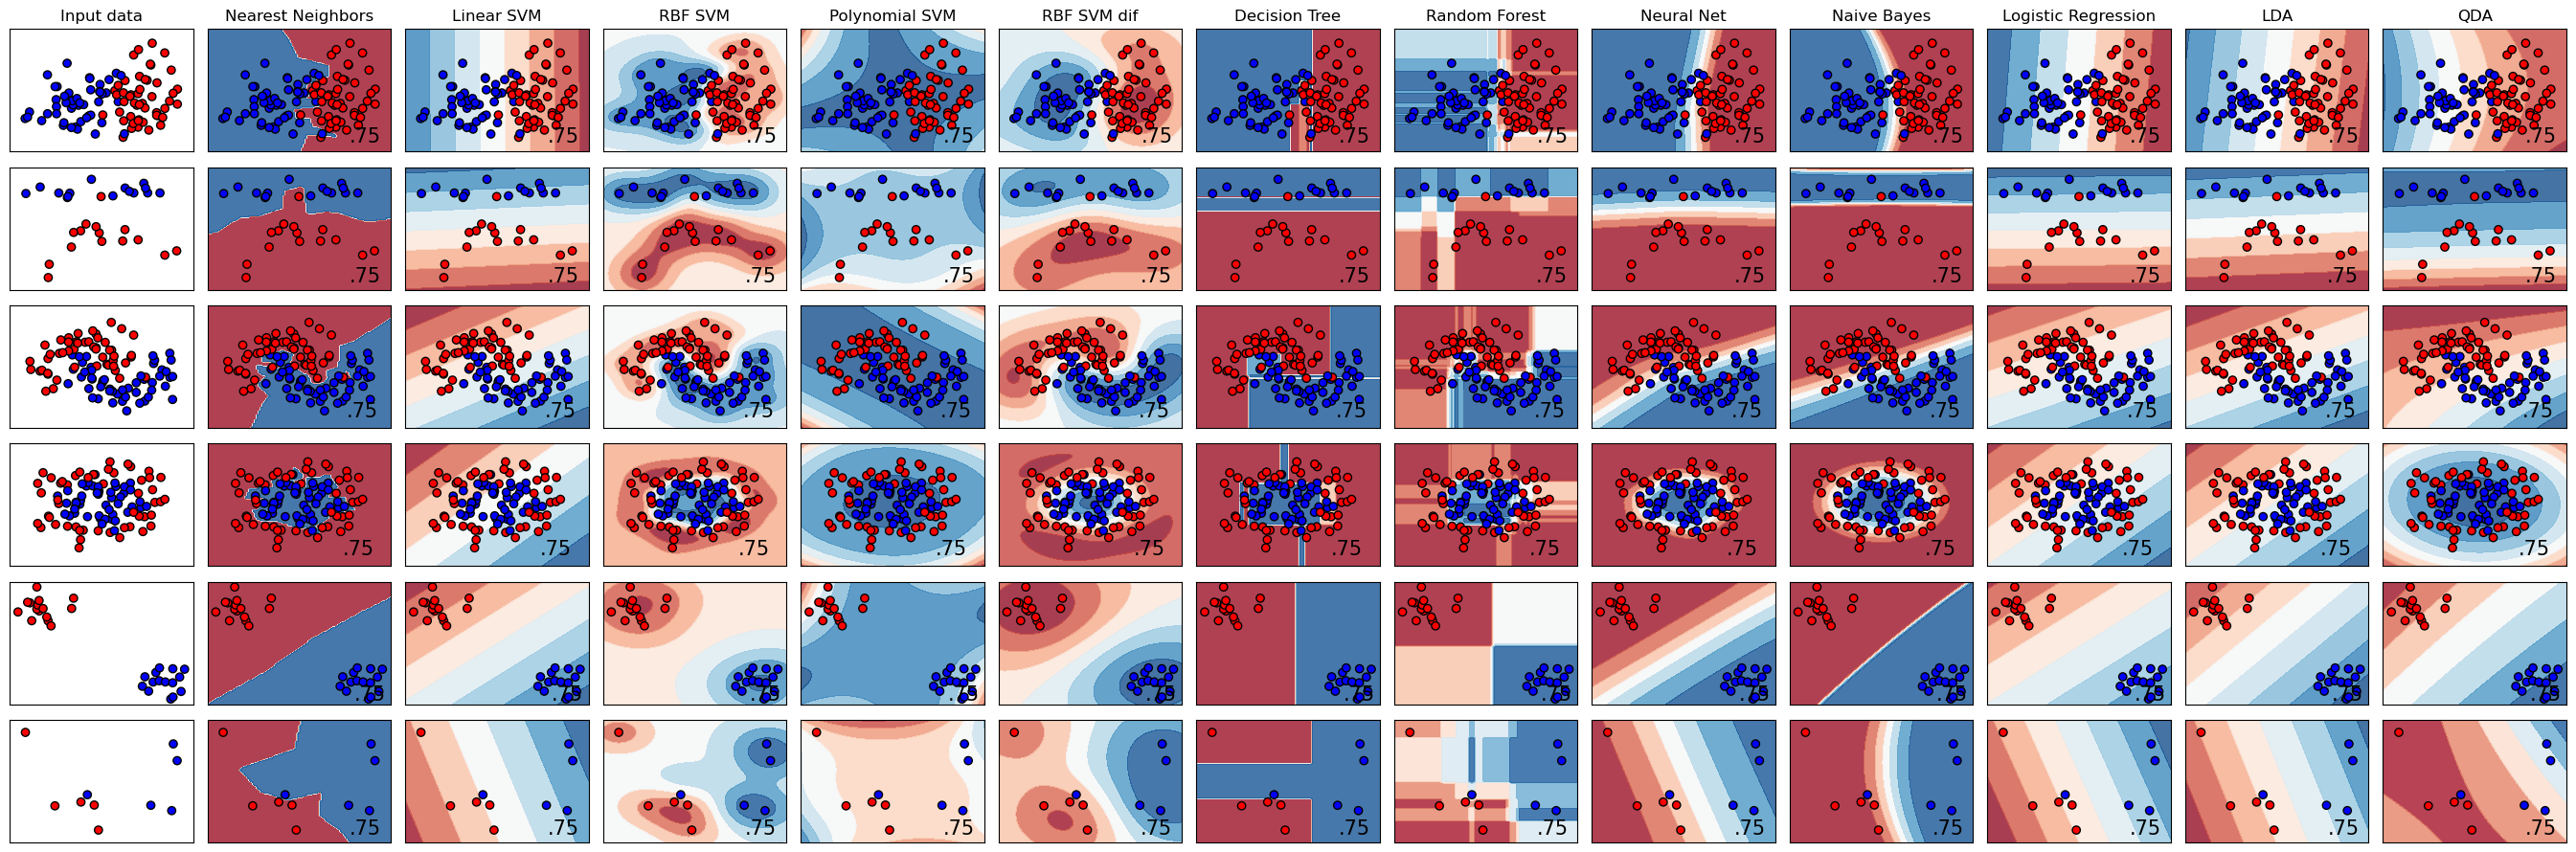

In [384]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=30, features=2, informative=2, random_state=42),
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    generate_blobs_data(samples=30, centers=2, features=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42)
]

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
     "Polynomial SVM",
    # "Gaussian Process",
    "RBF SVM dif",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    # "AdaBoost",
    "Naive Bayes",
    "Logistic Regression",
    "LDA",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(n_neighbors=1),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    SVC(kernel="poly", degree=4, probability=True),
    SVC(kernel="rbf", probability=True),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    # AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

default_plotter(datasets, names, classifiers)

In [385]:
### DETAILED COMPARISONS

# NEAREST NEIGHBOURS

In kNN the decision boundary is the dividing line or surface that separates the feature space into regions classified as one class versus another. 
It's based on the proximity of a query point to the training points. 

The boundary can be highly non-linear and jagged, especially for low values of k, because each region is determined by the immediate nearest training points. Every data point essentially influences the shape of the boundary.

For 1-NN, the decision boundary is very sensitive to noise and may overfit the training data. 
The decision boundary for 1-NN forms a Voronoi diagram, where the feature space is divided into regions based on the closest training point. 
The edges of these regions represent the decision boundaries.

As k increases, the boundary becomes smoother because the classifier takes a majority vote, reducing sensitivity to individual noisy points.

The shape of regions can be also influenced by the choice of distance metric.

It can handle also not linearly separable data points and more complex shapes as it follows the borders of the regions according to the class distributions in space.


In [387]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_grid_data(grid_size=4, random_state=5),
    generate_grid_data(grid_size=4, random_state=5)
]


names = [
    "Nearest Neighbors K=1",
    "Nearest Neighbors K=1 - manhattan",
    "Nearest Neighbors K=1 - cosine",
    "Nearest Neighbors K=3",
    "Nearest Neighbors K=5"
]

classifiers = [
    KNeighborsClassifier(n_neighbors=1, metric='euclidean'),
    KNeighborsClassifier(n_neighbors=1, metric='manhattan'),
    KNeighborsClassifier(n_neighbors=1, metric='cosine'),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
]

C:\Users\vladi\AppData\Local\Temp\ipykernel_31452\3632634918.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


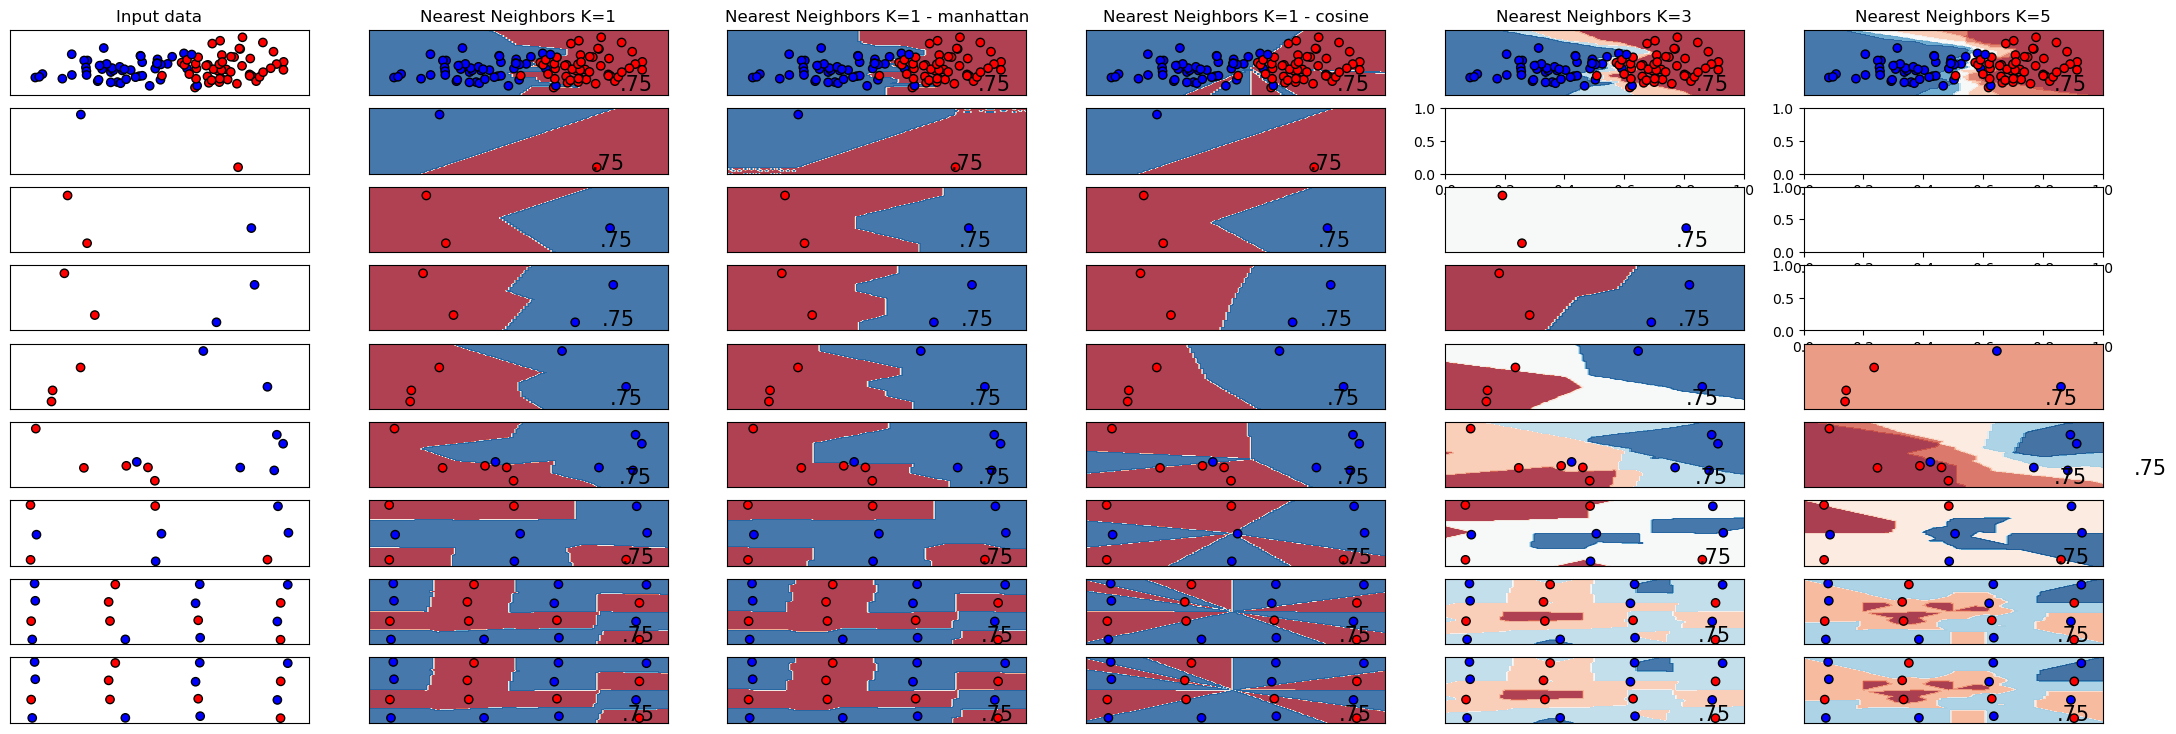

In [388]:
default_plotter(datasets, names, classifiers)

# DECISION TREE

The decision boundary for a decision tree classifier represents the regions in the feature space where the model assigns the same class label.

A decision tree splits the feature space into regions using axis-aligned splits (e.g., "feature >5" or "feature  ≤3").
The resulting decision boundary is a collection of rectangles (in 2D) or hyper-rectangles (in higher dimensions).

The decision boundary is a combination of axis-aligned segments or rectangles.
Each rectangle corresponds to a leaf node of the tree, and all points within it are assigned the same label.


Shallow Tree: Fewer splits → Large rectangular regions.
Deep Tree: More splits → Smaller, finely divided regions → Captures finer details of the data distribution but can overfit.


In [390]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_grid_data(grid_size=4, random_state=5),
    generate_grid_data(grid_size=4, random_state=5)
]


names = [
    "Decision Tree depth=1",
    "Decision Tree depth=2",
    "Decision Tree depth=3",
    "Decision Tree depth=4",
    "Decision Tree depth=5",
]


classifiers = [
    DecisionTreeClassifier(max_depth=1, random_state=42),
    DecisionTreeClassifier(max_depth=2, random_state=42),
    DecisionTreeClassifier(max_depth=3, random_state=42),
    DecisionTreeClassifier(max_depth=4, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42)
]


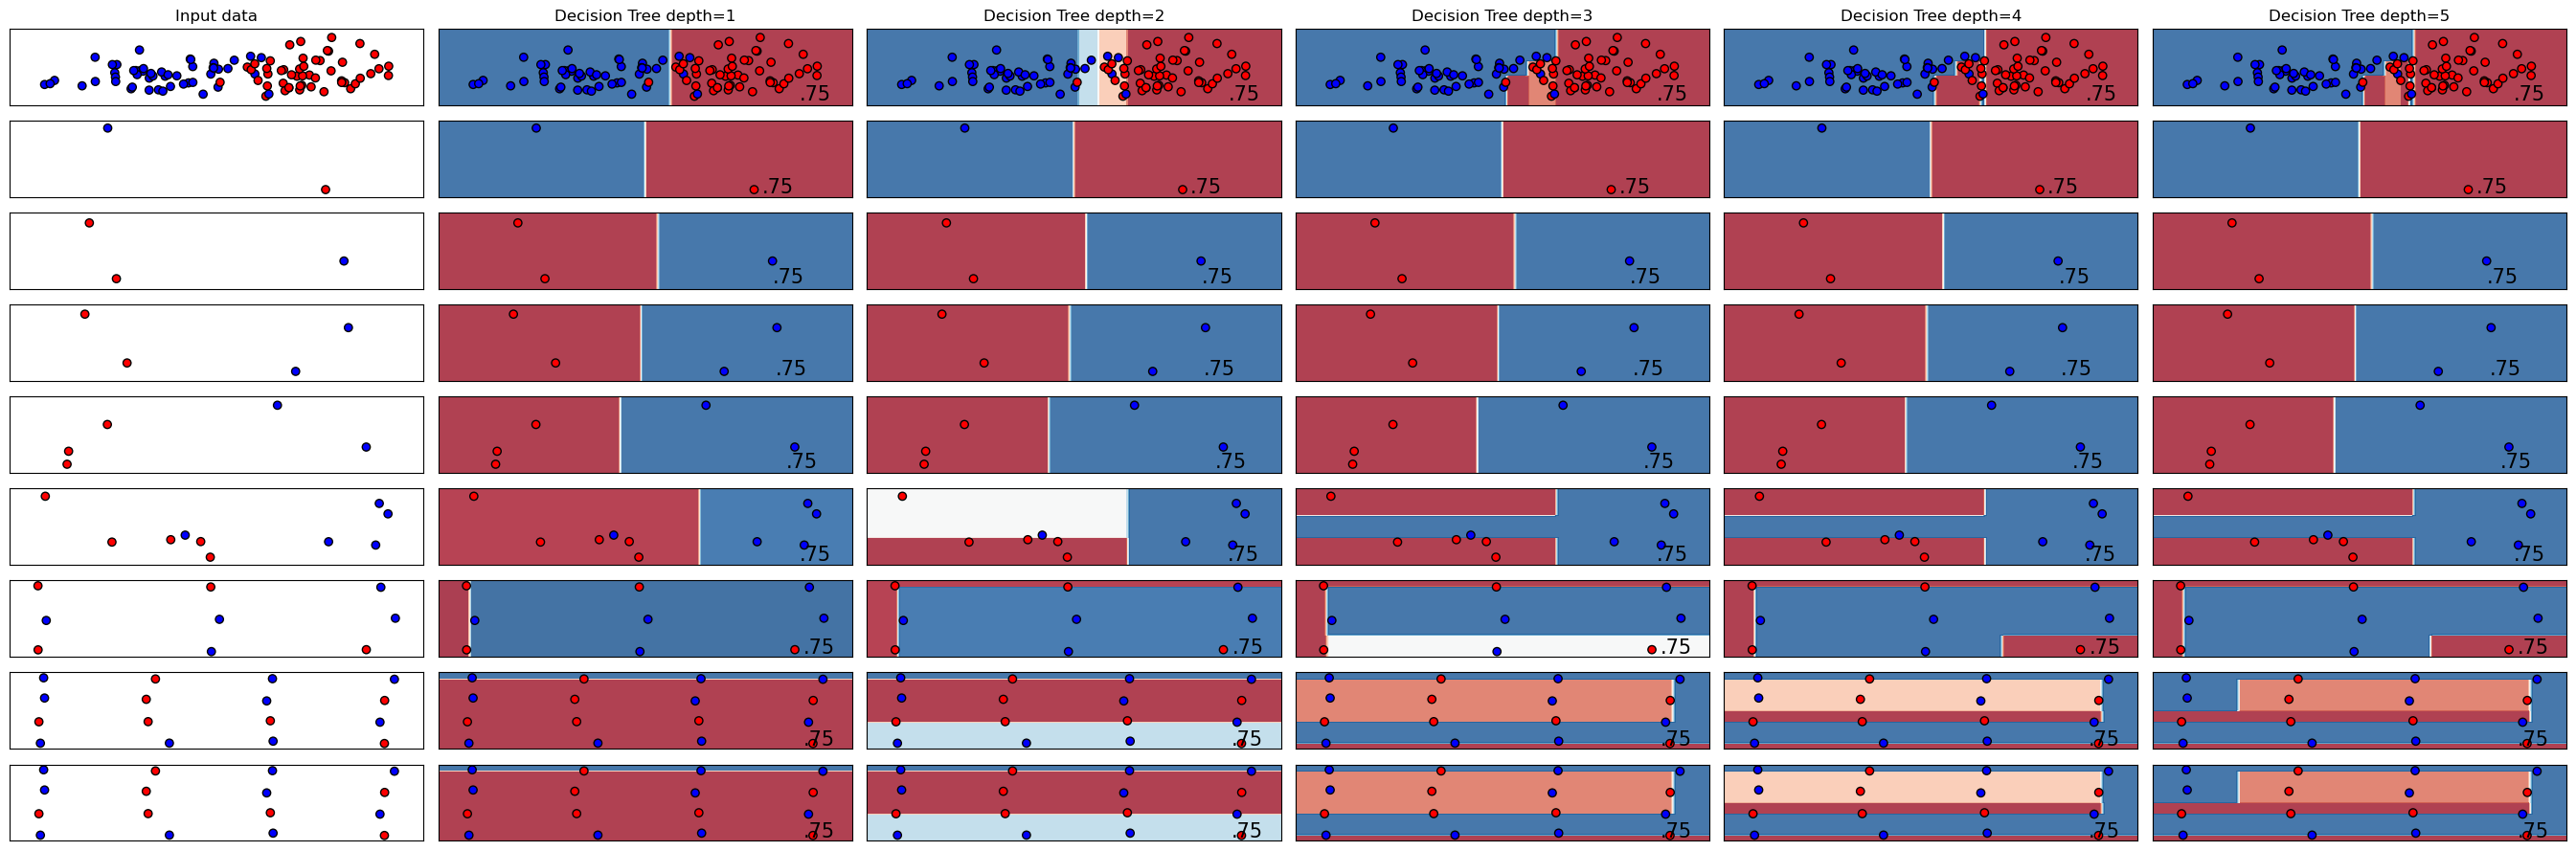

In [391]:
default_plotter(datasets, names, classifiers)

# RANDOM FOREST

Each tree generates its own decision boundary, which is typically axis-aligned and piecewise-rectangular.

The boundary is more detailed in regions where the training data is dense and less so in sparse regions. This reflects how trees adapt to local patterns.

More trees → Smoother and more stable boundary, as more trees dilute the influence of outliers and noise.
Fewer trees → Slightly noisier, jagged boundaries resembling individual tree splits.

Shallow trees → Coarser boundaries, unable to capture small patterns.
Deep trees → Finer boundaries, but overfitting risk for individual trees is mitigated by averaging.



In [393]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_grid_data(grid_size=4, random_state=5),
    generate_grid_data(grid_size=4, random_state=5)
]


names = [
    "Random Forest N=1",
    "Random Forest N=2",
    "Random Forest N=5",
    "Random Forest N=10",
    "Random Forest N=50",
]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=1, max_features=1, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=2, max_features=1, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=5, max_features=1, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1, random_state=42)
    
]

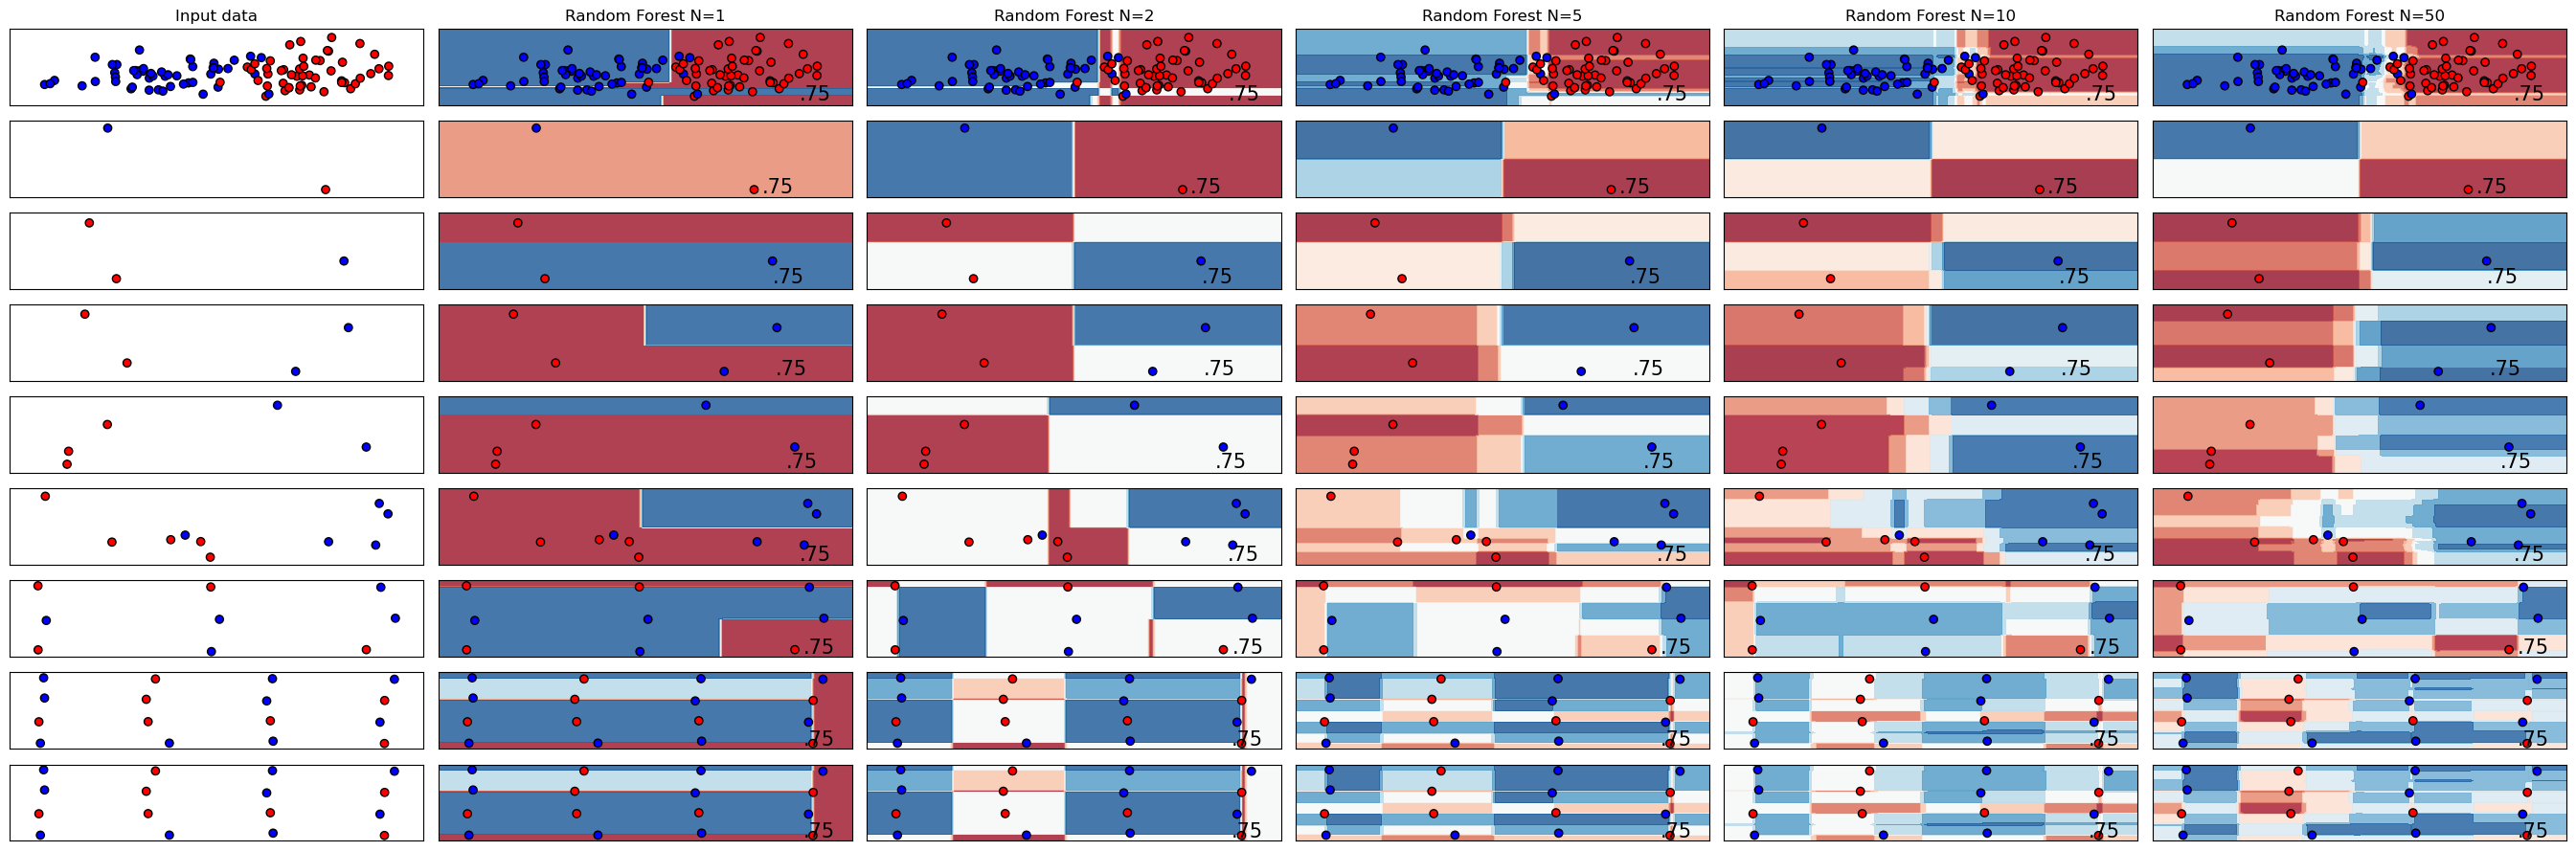

In [394]:
default_plotter(datasets, names, classifiers)

# NAIVE BAYES

The decision boundary separates regions where one class has a higher probability than the others.
Mathematically, it’s where P(y1∣X)=P(y2∣X), meaning the probabilities of two classes are equal.

Boundaries are often linear or moderately curved, reflecting the simplicity of the probabilistic model.

The type of feature distributions assumed (Gaussian, multinomial, etc.) directly influences the boundary.

If one class has a much higher prior probability P(y), the decision boundary skews in favor of that class.


In [396]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_grid_data(grid_size=4, random_state=5),
    generate_grid_data(grid_size=4, random_state=5)
]


names = [
    "Gaussian Naive Bayes",
    "Gaussian Naive Bayes",
    "Gaussian Naive Bayes",
    "Gaussian Naive Bayes",
    "Gaussian Naive Bayes",
]

classifiers = [
    GaussianNB(),
    GaussianNB(),
    GaussianNB(),
    GaussianNB(),
    GaussianNB(),
    
]

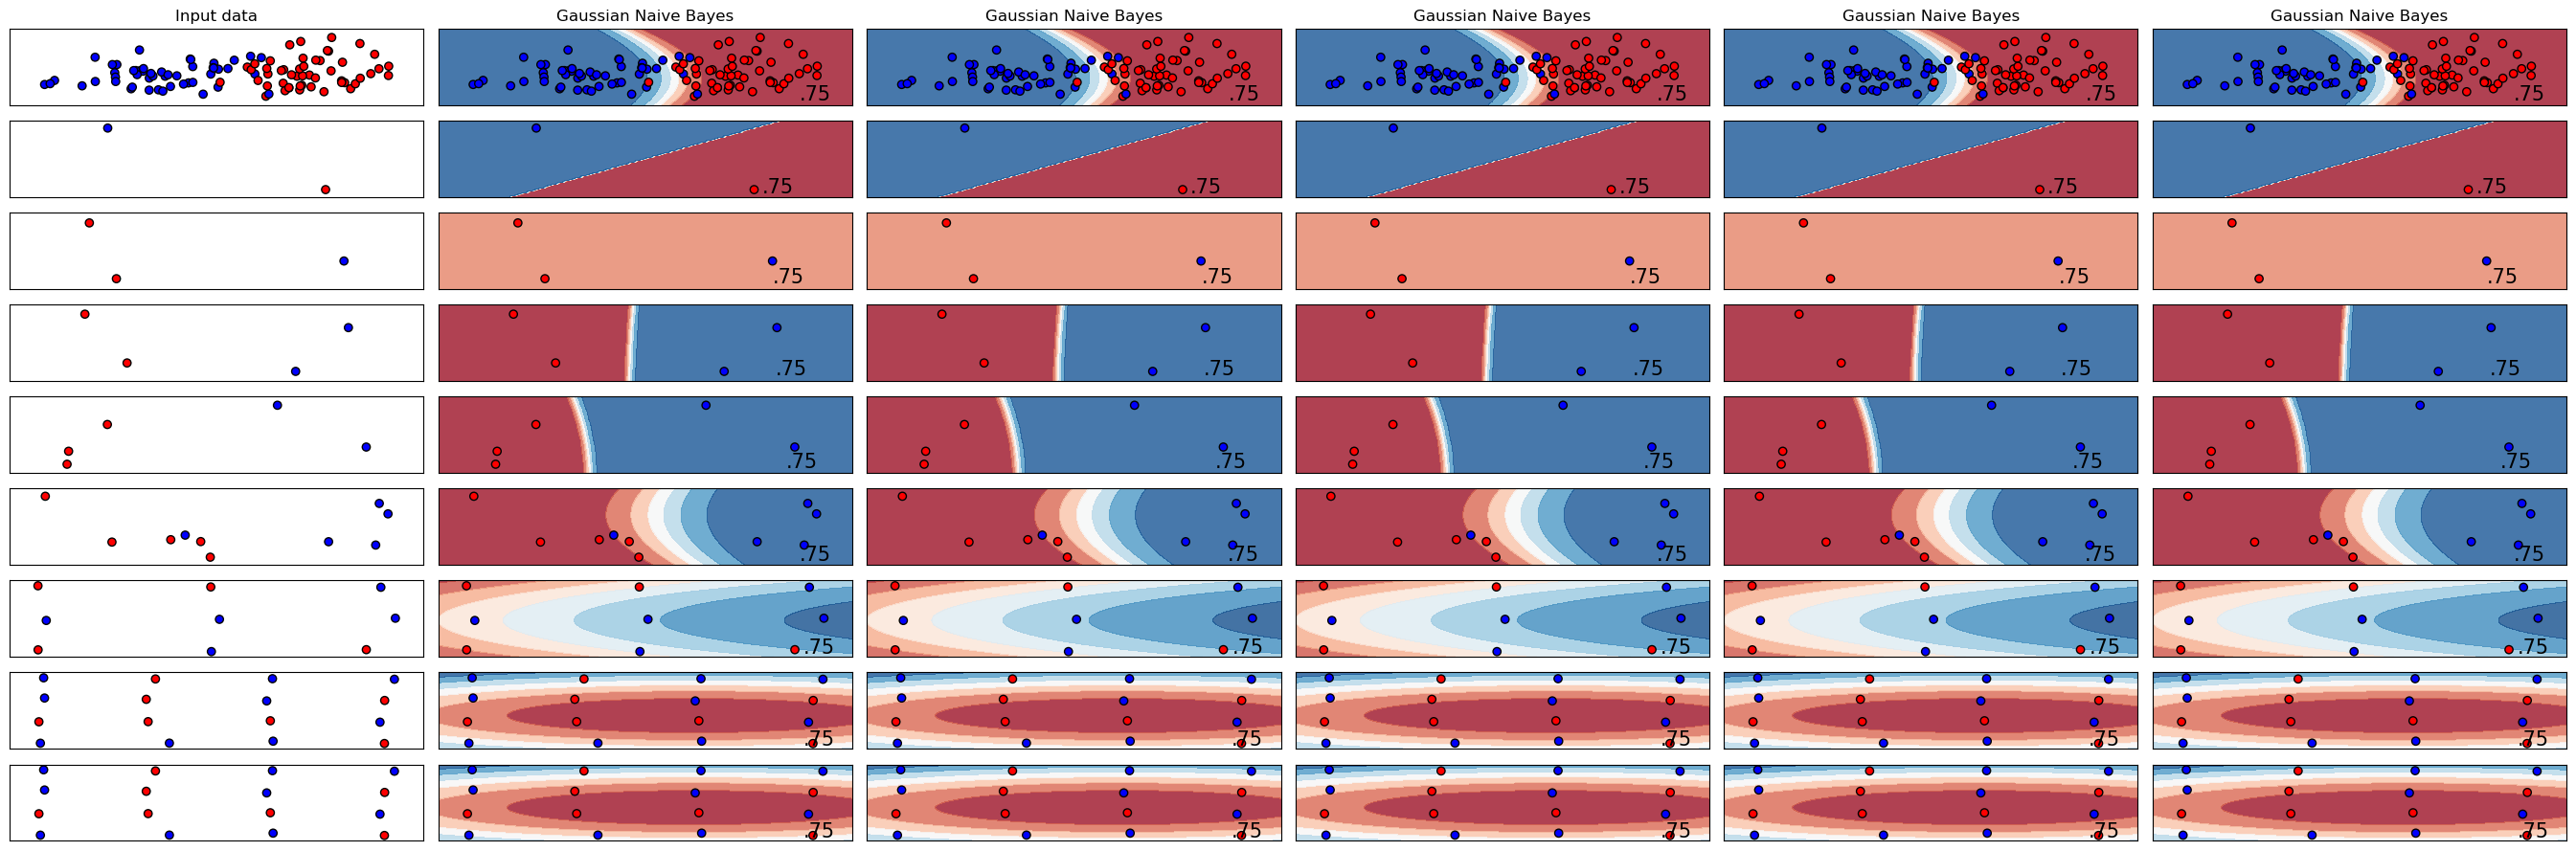

In [397]:
default_plotter(datasets, names, classifiers)

# LOGISTIC REGRESSION
The region where the predicted probability of one class equals that of another (typically at 50%).
Logistic regression produces a linear decision boundary because it is based on a linear combination of input features passed through a sigmoid function.
Using logistic regression to classify two classes in a 2D plane produces the decision boundary as a straight line. In higher dimensions, it becomes a hyperplane. Due to the linear nature of DB it cannot effectively separate non-linear patterns such as moons or blobs.

<!-- Regularization can shrink the coefficients leading to less steepness until we reach the horizontal line -> which gives us the average for the dependent variable. -->
With too much regularization, the model may oversimplify, leading to underfitting and a less effective boundary.

In [399]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_moons_data(samples=30, random_state=42)
]


names = [
    "Logistic Regression",
    "Logistic Regression",
    "Logistic Regression",
    "Logistic Regression",
    "Logistic Regression",
    "LogReg no reg.",
    "LogReg L1 reg.",
    "LogReg L2 reg.",
    "LogReg ElasticNet reg."

]

classifiers = [
    LogisticRegression(),
    LogisticRegression(),
    LogisticRegression(),
    LogisticRegression(),
    LogisticRegression(),
    LogisticRegression(penalty=None),
    LogisticRegression(penalty="l1", solver="liblinear"),
    LogisticRegression(penalty="l2"),
    LogisticRegression(penalty="elasticnet", solver="saga") # requires saga solver but doesnt work here TODO
    
]

C:\Users\vladi\AppData\Local\Temp\ipykernel_31452\3632634918.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


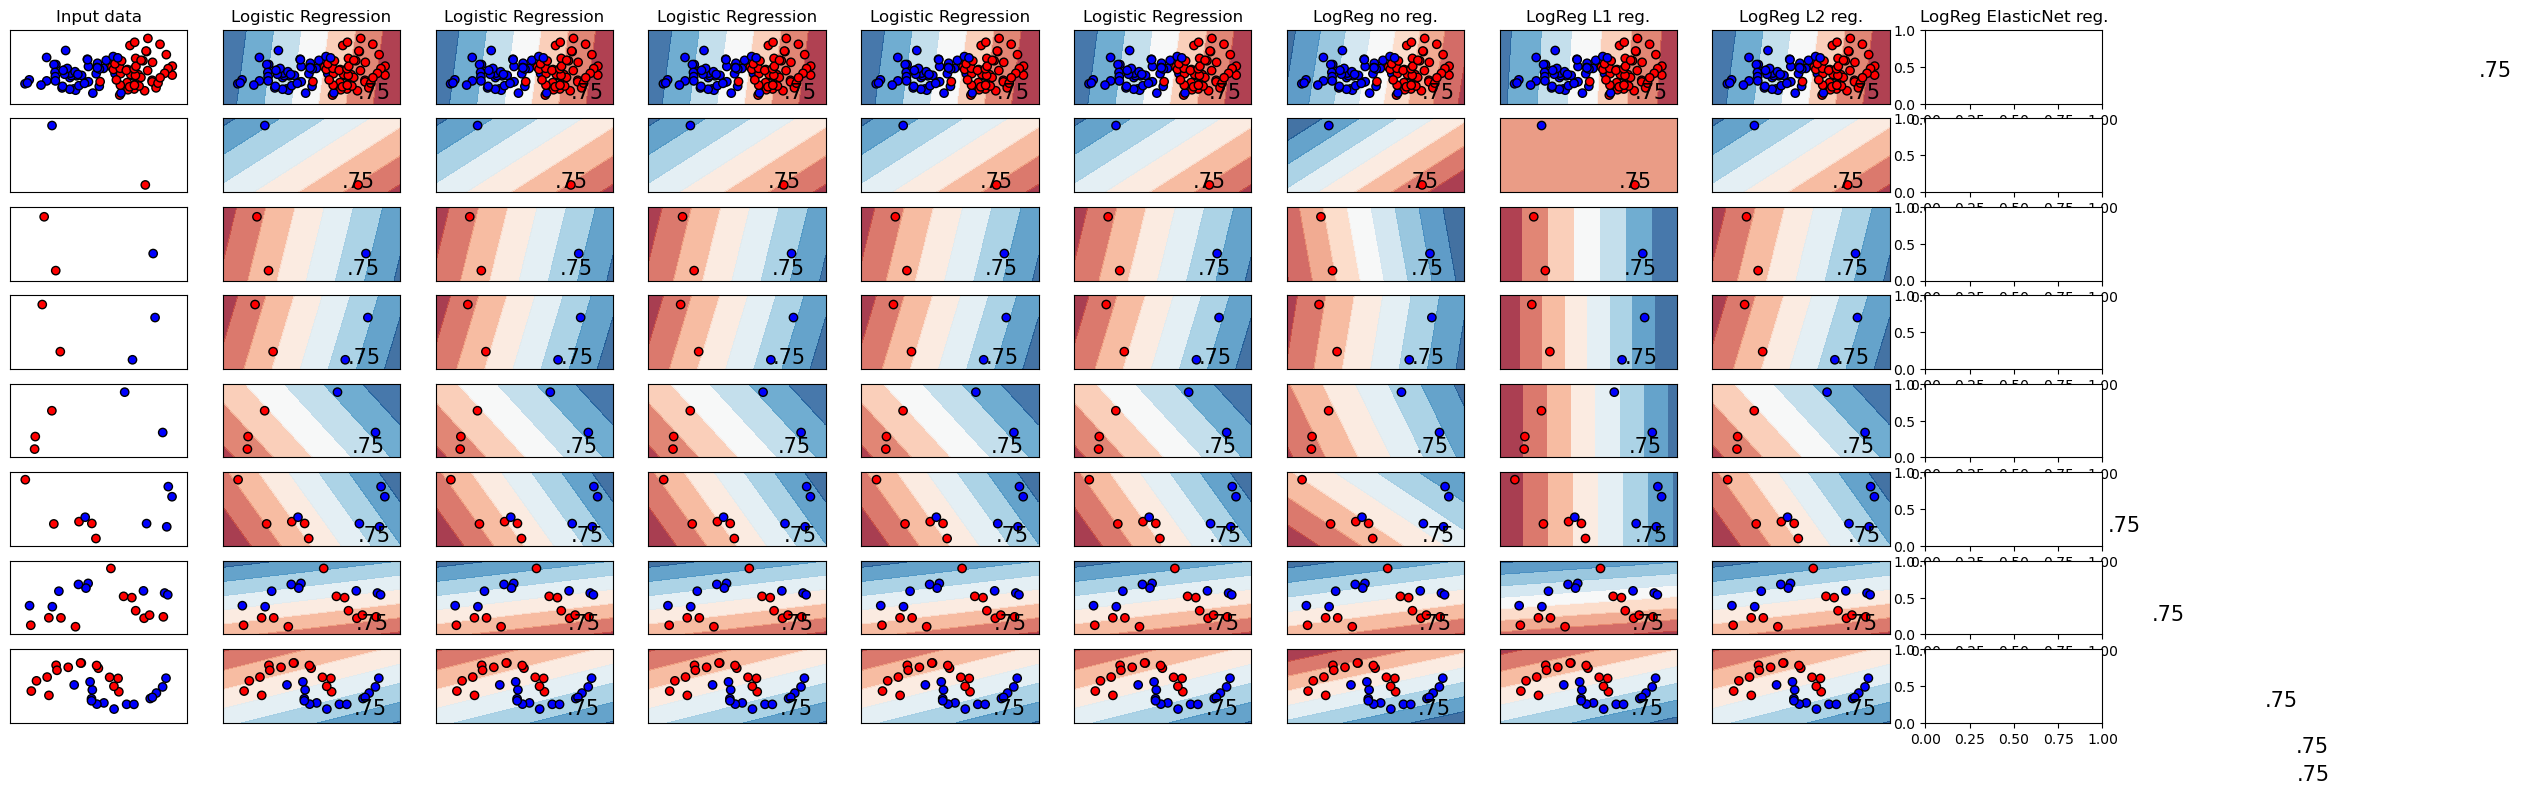

In [400]:
default_plotter(datasets, names, classifiers)

# Linear discriminant analysis

It tries to find the linear combination of features that best separates the classes. This results in a linear decision boundary.

The decision boundary is a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the two classes.
The decision boundary is perpendicular to the line connecting the class means and located based on the prior probabilities and covariances. The method tries to separate the two means as much as possible.

Since it produces a linear decision boundary it has issues separating non-linear patterns such as overlapping distributions.

In [402]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_moons_data(samples=30, random_state=42)
]


names = [
    "LDA",
    "LDA",
    "LDA",
    "LDA",
    "LDA",
]

classifiers = [
    LinearDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),

    
]

C:\Users\vladi\AppData\Local\Temp\ipykernel_31452\3632634918.py:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


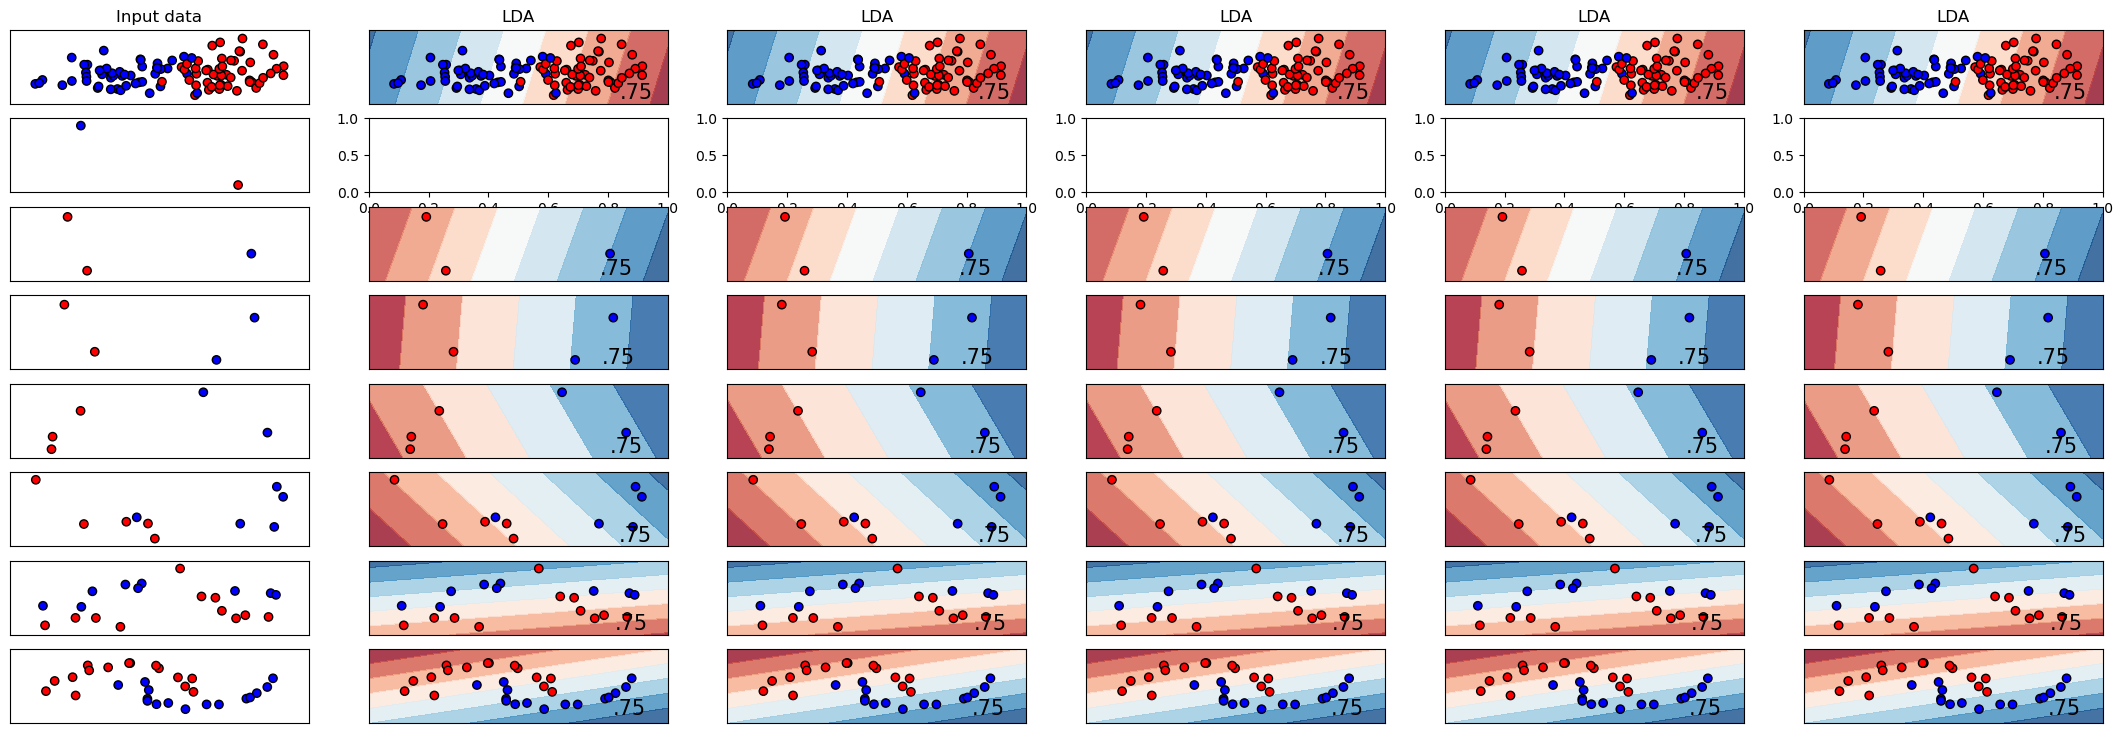

In [403]:
default_plotter(datasets, names, classifiers)

# Quadratic discriminant analysis

QDA allows each class to have its own covariance matrix instead of assuming a shared covariance matrix for all classes.
This results in quadratic decision boundaries rather than linear ones. 
QDA is more flexible than LDA and can model non-linear relationships between features and classes, so it can also handle a more complex datasets.

In [405]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "QDA",
    "QDA",
    "QDA",
    "QDA",
    "QDA",
]

classifiers = [
    QuadraticDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\vladi\anaconda3\Lib\site-

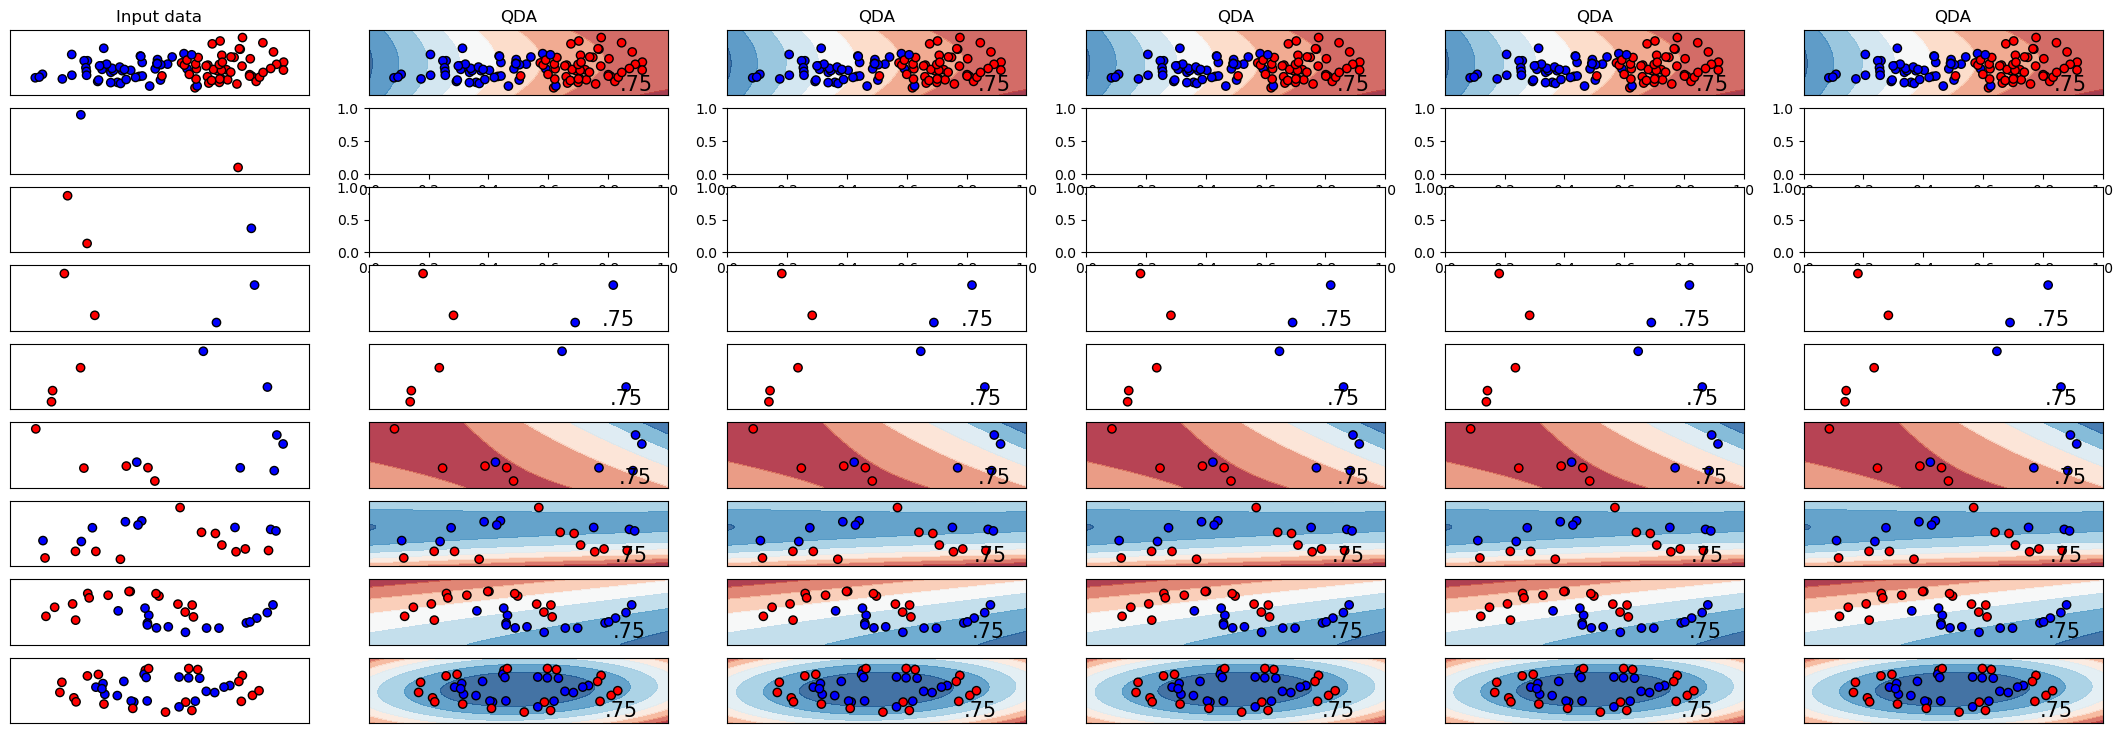

In [406]:
default_plotter(datasets, names, classifiers)

# MLP

The hidden layer's non-linearity allows the MLP to model non-linear decision boundaries. 



For a single neuron can specify decision boundary is linear because the single neuron applies a weighted sum of the inputs so it separates the space in two subspaces. By introducing a hidden layer we are introducing an arbitrary number of these space divisions which we can combine in the output neuron.
So hidden neurons collectively partition the feature space into regions and combine them to form the curved boundary.

For linearly separable data (e.g., points separable by a straight line), the decision boundary of an MLP can resemble that of logistic regression: a straight line or hyperplane. If the hidden layer has enough neurons, it can still introduce some slight curvature, but the problem doesn’t require it.

With enough neurons in the hidden layer, an MLP can approximate any decision boundary (this is a result of the Universal Approximation Theorem). However, the number of neurons and training data must be sufficient to represent the complexity of the data.

In [408]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "MLP 1 hidden neuron",
    "MLP 2 hidden neurons",
    "MLP 5 hidden neurons",
    "MLP 10 hidden neurons",
    "MLP 100 hidden neurons",
    "MLP 400 hidden neurons", 
    "MLP 1000 hidden neurons"
]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(1,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(1000,), activation='relu', max_iter=1000, random_state=42)

]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_m

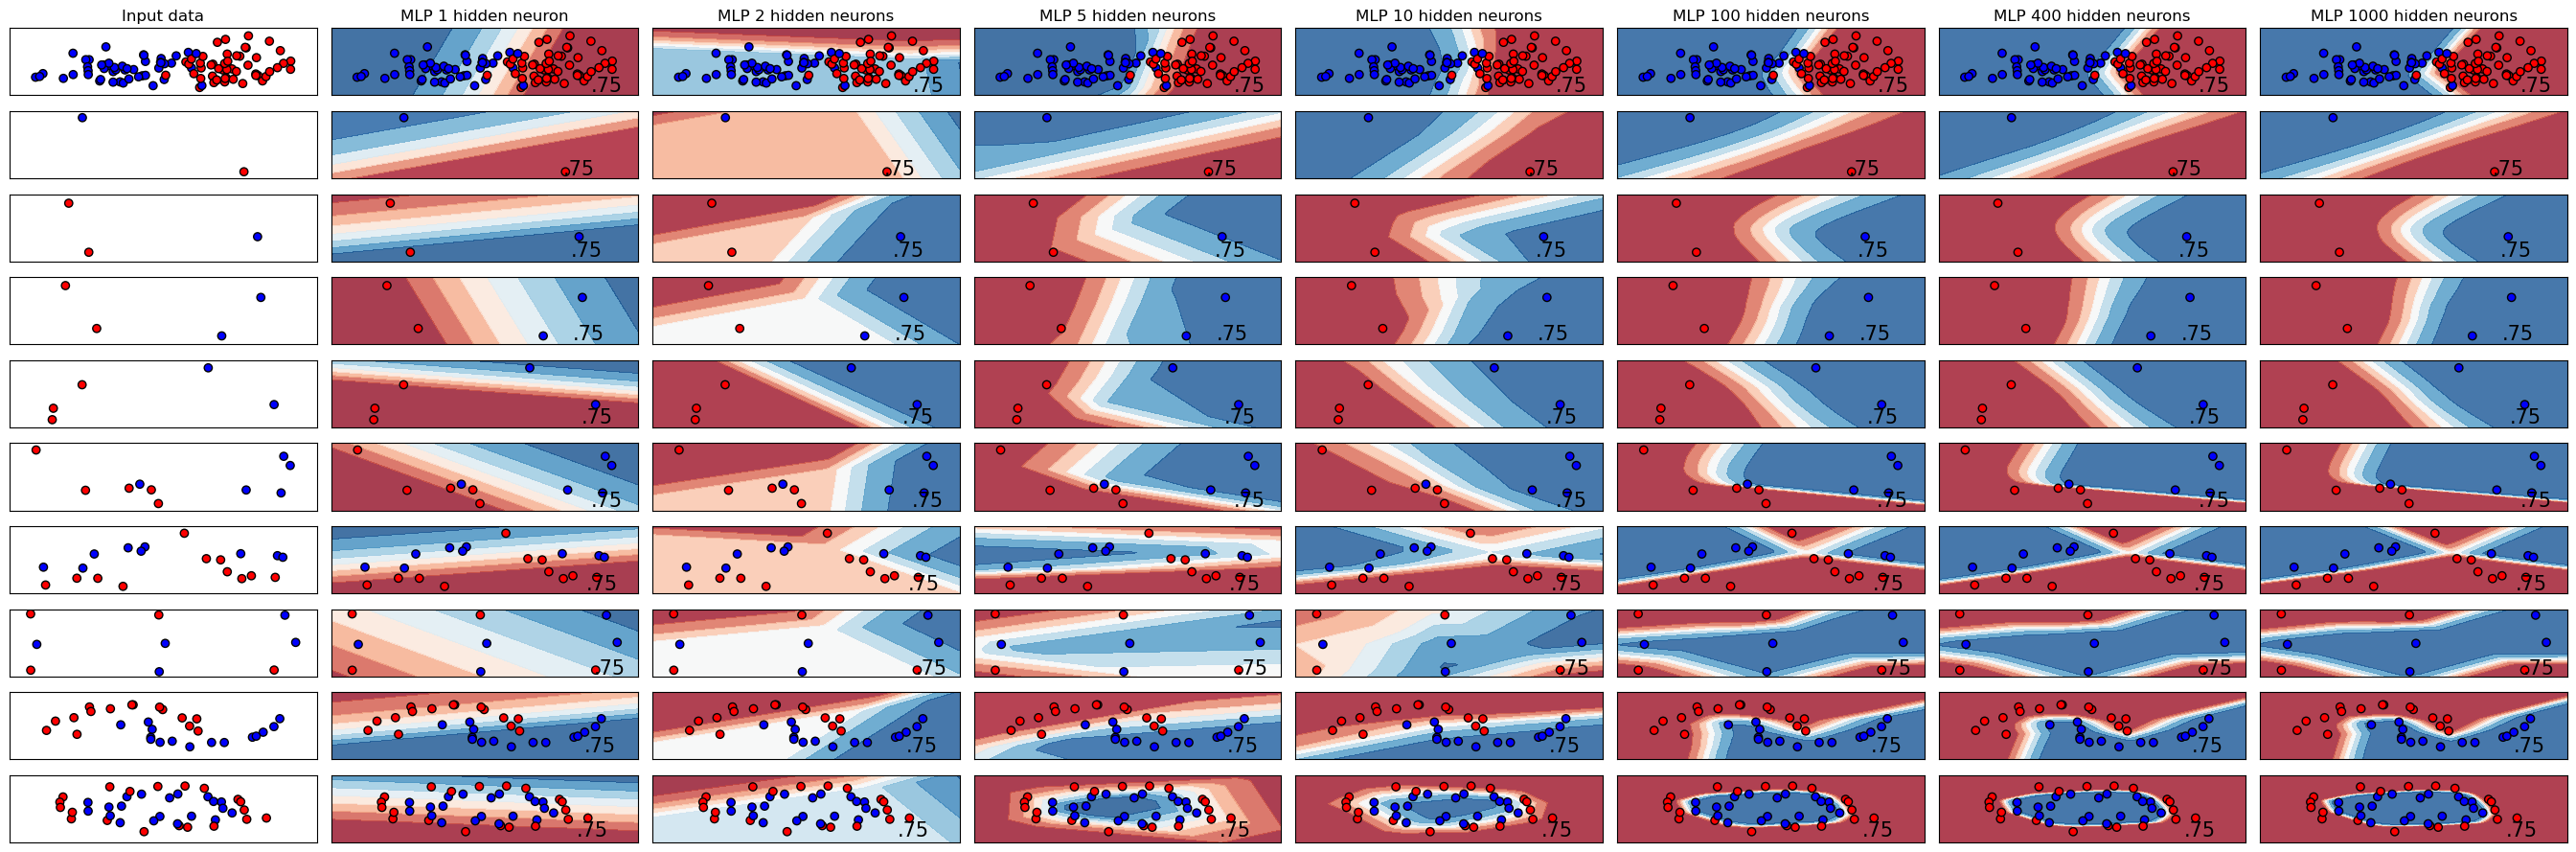

In [409]:
default_plotter(datasets, names, classifiers)

### How hyperparameters affect the decision boundary

#### Number of neurons in the hidden layer:

Few neurons: The model may underfit and produce overly simple decision boundaries (e.g., straight or slightly curved lines).
More neurons: Allows the model to capture more complex decision boundaries.
For example, with moons data, adding neurons enables the network to curve and adapt to the crescent shapes.
Too many neurons: Increases the risk of overfitting, where the decision boundary becomes unnecessarily complex and starts fitting noise.



In [411]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "MLP 1 HNs logistic act",
    "MLP 2 HNs logistic act",
    "MLP 5 HNs logistic act",
    "MLP 10 HNs logistic act",
    "MLP 100 HNs logistic act",
    "MLP 400 HNs logistic act",
    "MLP 1000 HNs logistic act"
]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(1,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(400,), activation='tanh', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(1000,), activation='tanh', max_iter=1000, random_state=42)

]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_m

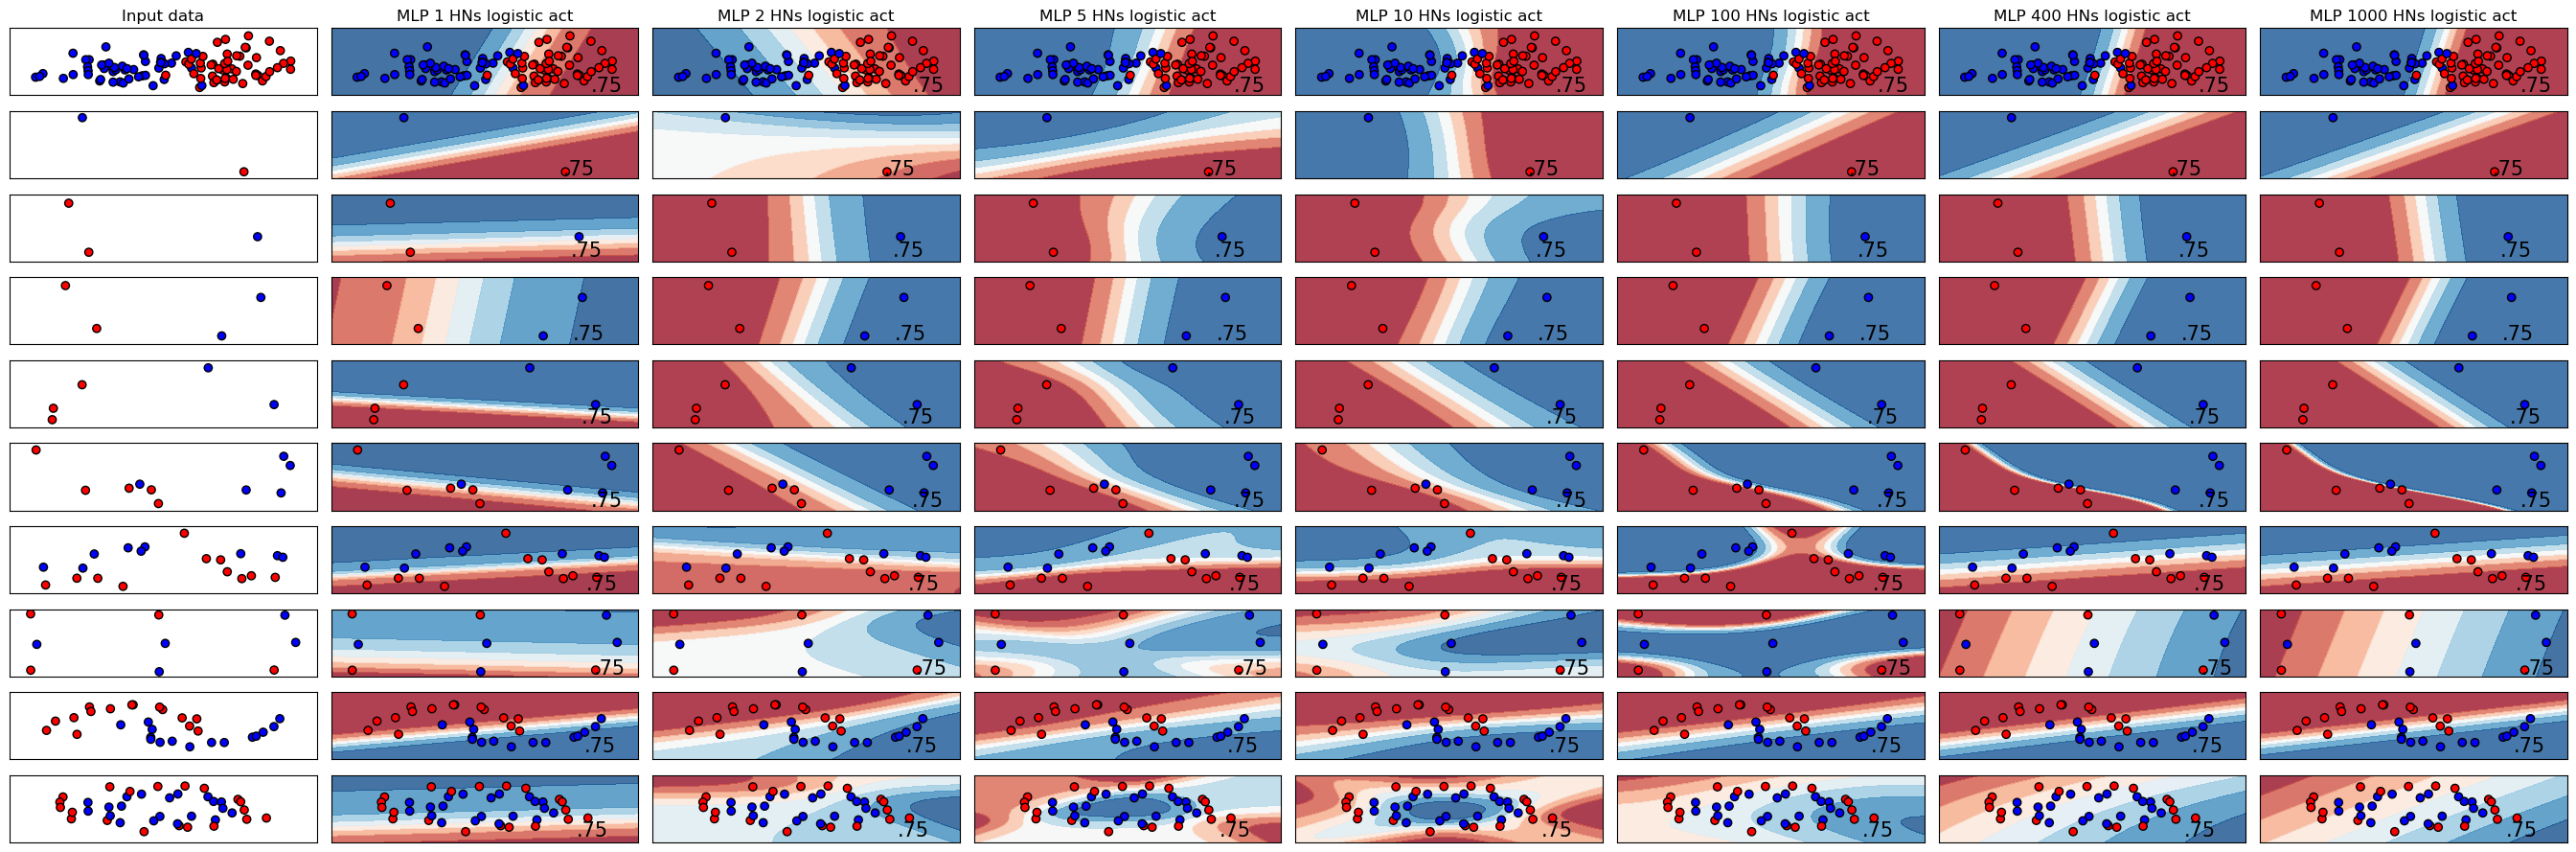

In [412]:
default_plotter(datasets, names, classifiers)

#### Activation function:

The choice of activation function in the hidden layer determines how non-linear the decision boundary can become:
ReLU (Rectified Linear Unit): Creates piecewise linear boundaries.
Sigmoid or Tanh: Creates smoother, non-linear boundaries.

In [414]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "MLP 10 alpha=0.1",
    "MLP 10 alpha=1.0",
    "MLP 10 alpha=10.0",

    "MLP 100 alpha=0.1",
    "MLP 100 alpha=1.0",
    "MLP 100 alpha=10.0",
    
    "MLP 400 alpha=0.1",
    "MLP 400 alpha=1.0",
    "MLP 400 alpha=10.0",
]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, alpha=0.1),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, alpha=1),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, alpha=10),

    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, alpha=0.1),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, alpha=1),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, alpha=10),
    
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, alpha=0.1),
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, alpha=1),
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, alpha=10),

]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_m

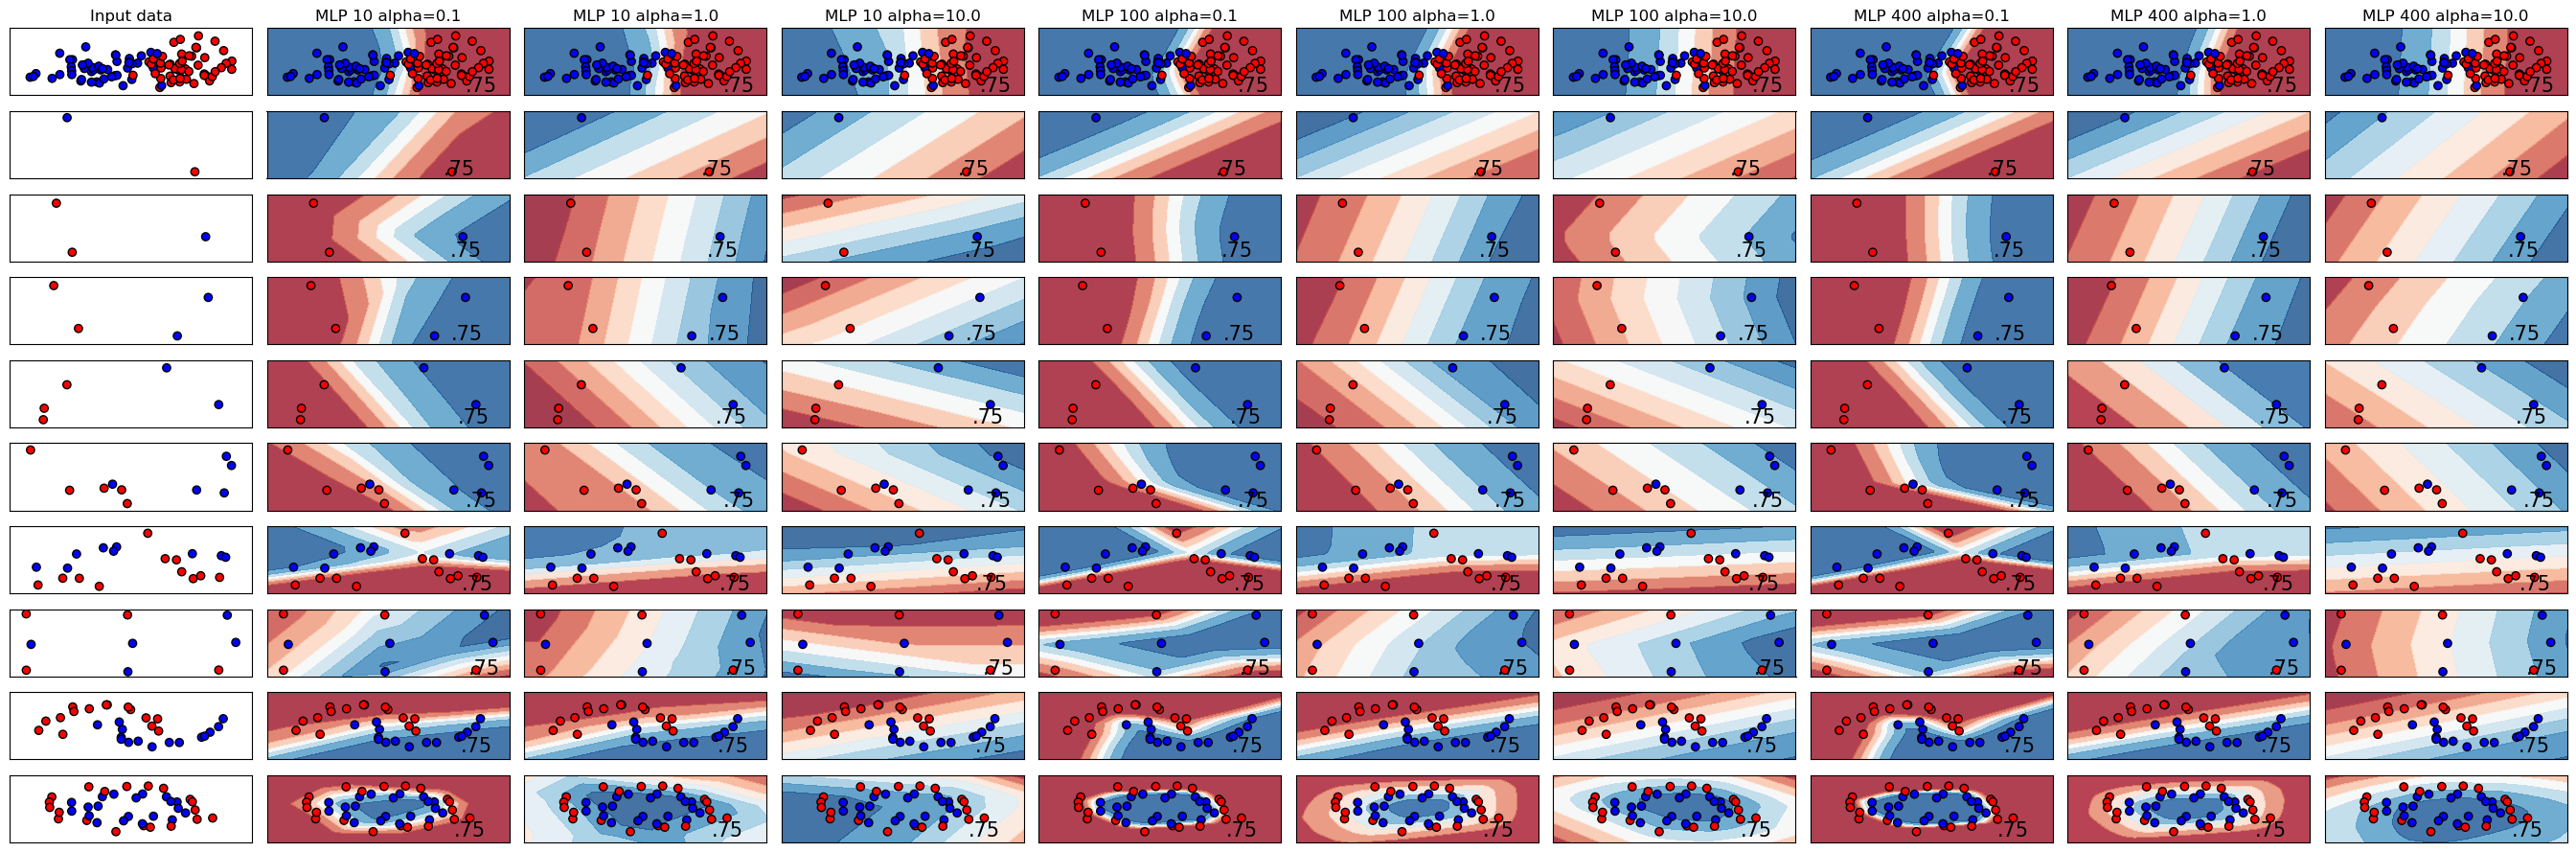

In [415]:
default_plotter(datasets, names, classifiers)

#### Regularization
Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

In [417]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "MLP 10 init lr=0.001",
    "MLP 10 init alpha=0.01",
    "MLP 10 init alpha=1.0",

    "MLP 100 init lr=0.001",
    "MLP 100 init alpha=0.01",
    "MLP 100 init alpha=1.0",
    
    "MLP 400 init lr=0.001",
    "MLP 400 init alpha=0.01",
    "MLP 400 init alpha=1.0",
]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.001),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.01),
    MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=1.0),

    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.001),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.01),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=1.0),
    
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.001),
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=0.01),
    MLPClassifier(hidden_layer_sizes=(400,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=1.0),

]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_m

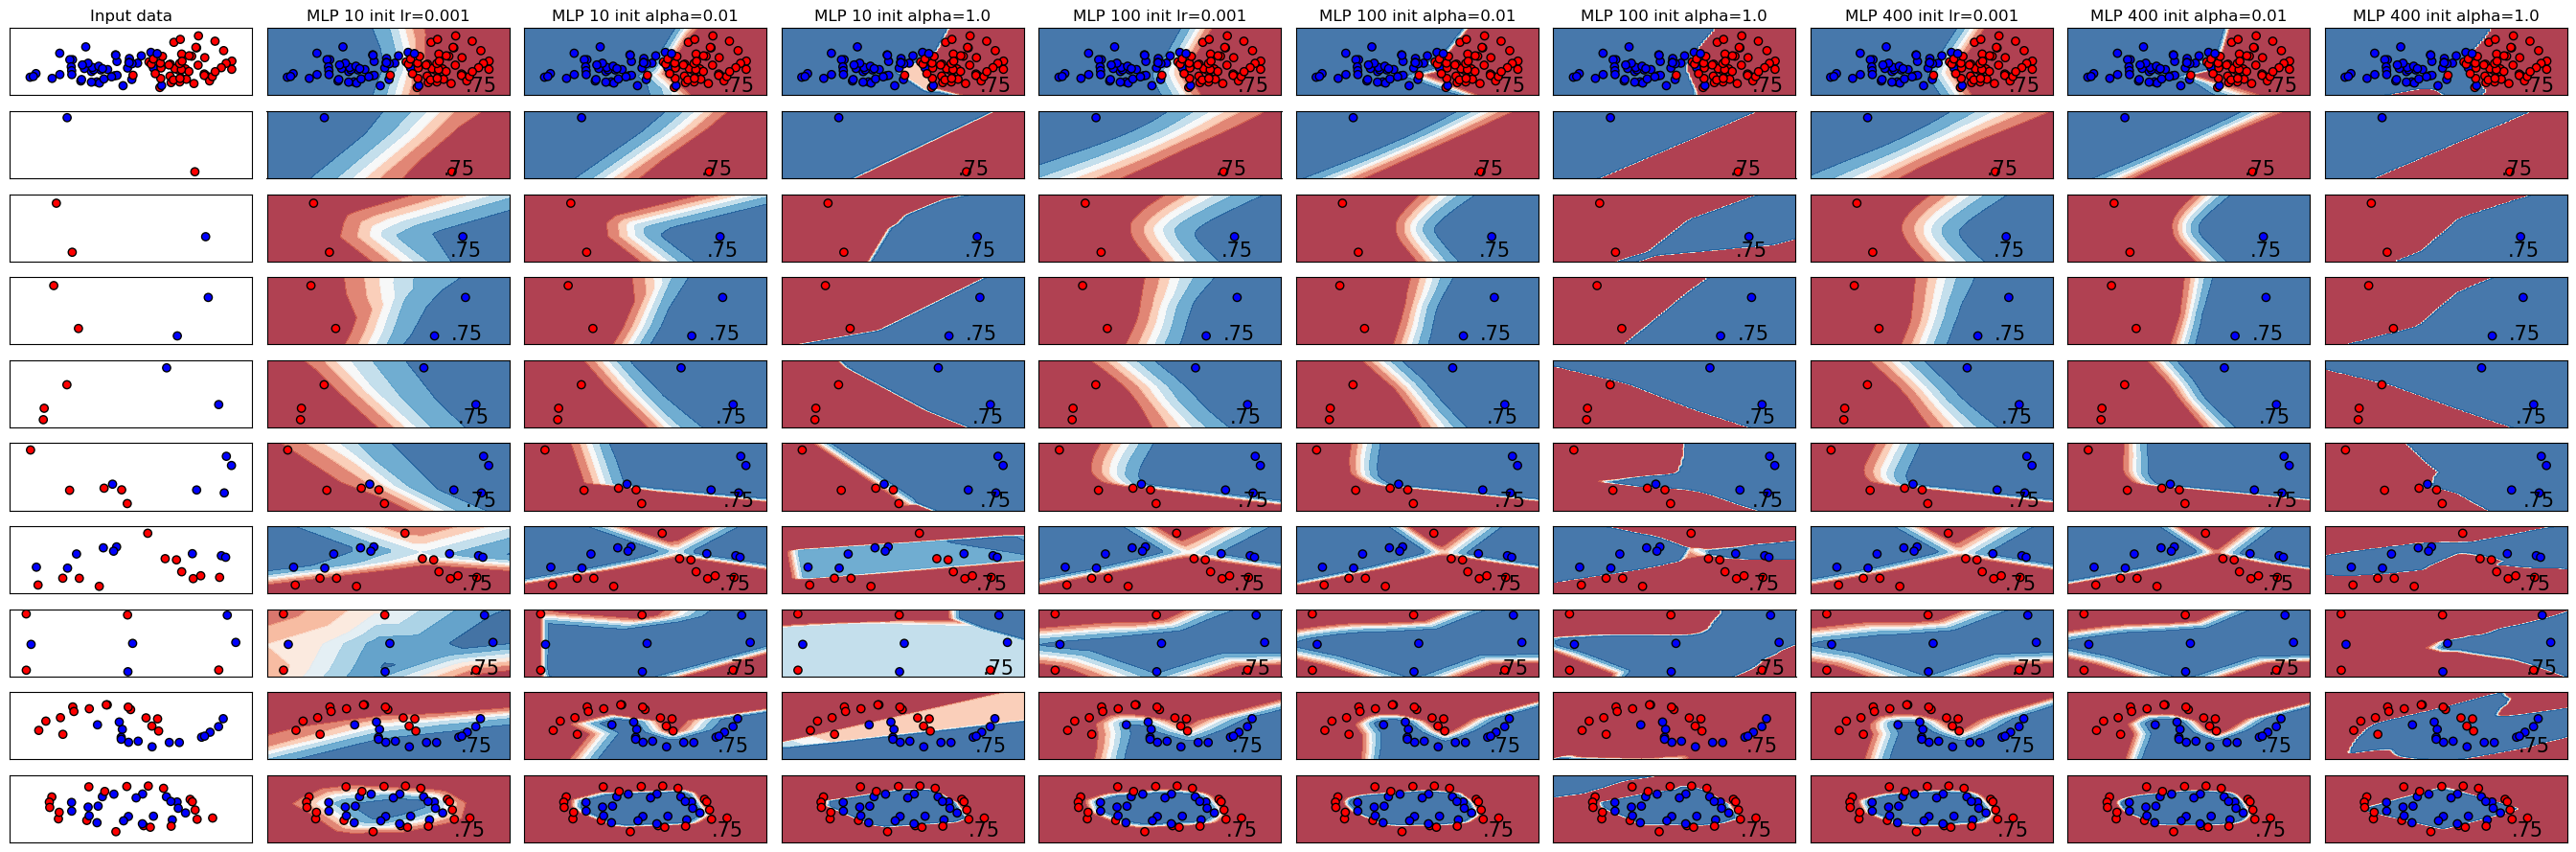

In [418]:
default_plotter(datasets, names, classifiers)

#### Learning Rate:

A low learning rate might cause the decision boundary to converge too slowly, resulting in suboptimal performance.
A high learning rate might lead to instability, causing the boundary to oscillate without finding a good fit.

#### Number of Training Epochs:

Training for too few epochs can lead to underfitting, with an overly simple boundary.
Too many epochs can lead to overfitting, where the boundary becomes unnecessarily intricate.

# What DB does MLP with more than 1 hidden layer generate?
TODO: Multiple layers just for fun

In [421]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "MLP 10, 10",
    "MLP 10, 10",
    "MLP 10, 10",

    "MLP 100, 100",
    "MLP 100, 100",
    "MLP 100, 100",
    
    "MLP 400, 400",
    "MLP 400, 400",
    "MLP 400, 400",

    "MLP 100, 50, 10",
]

classifiers = [
    MLPClassifier(hidden_layer_sizes=(10,10,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(10,10, ), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(10,10,), activation='relu', max_iter=1000, random_state=42),

    MLPClassifier(hidden_layer_sizes=(100,100,), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', max_iter=1000, random_state=42),
    
    MLPClassifier(hidden_layer_sizes=(400,400), activation='relu', max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(400,400), activation='relu', max_iter=1000, random_state=42,),
    MLPClassifier(hidden_layer_sizes=(400,400), activation='relu', max_iter=1000, random_state=42),

    MLPClassifier(hidden_layer_sizes=(100,50,10,), activation='relu', max_iter=1000, random_state=42),

]

C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\neural_network\_m

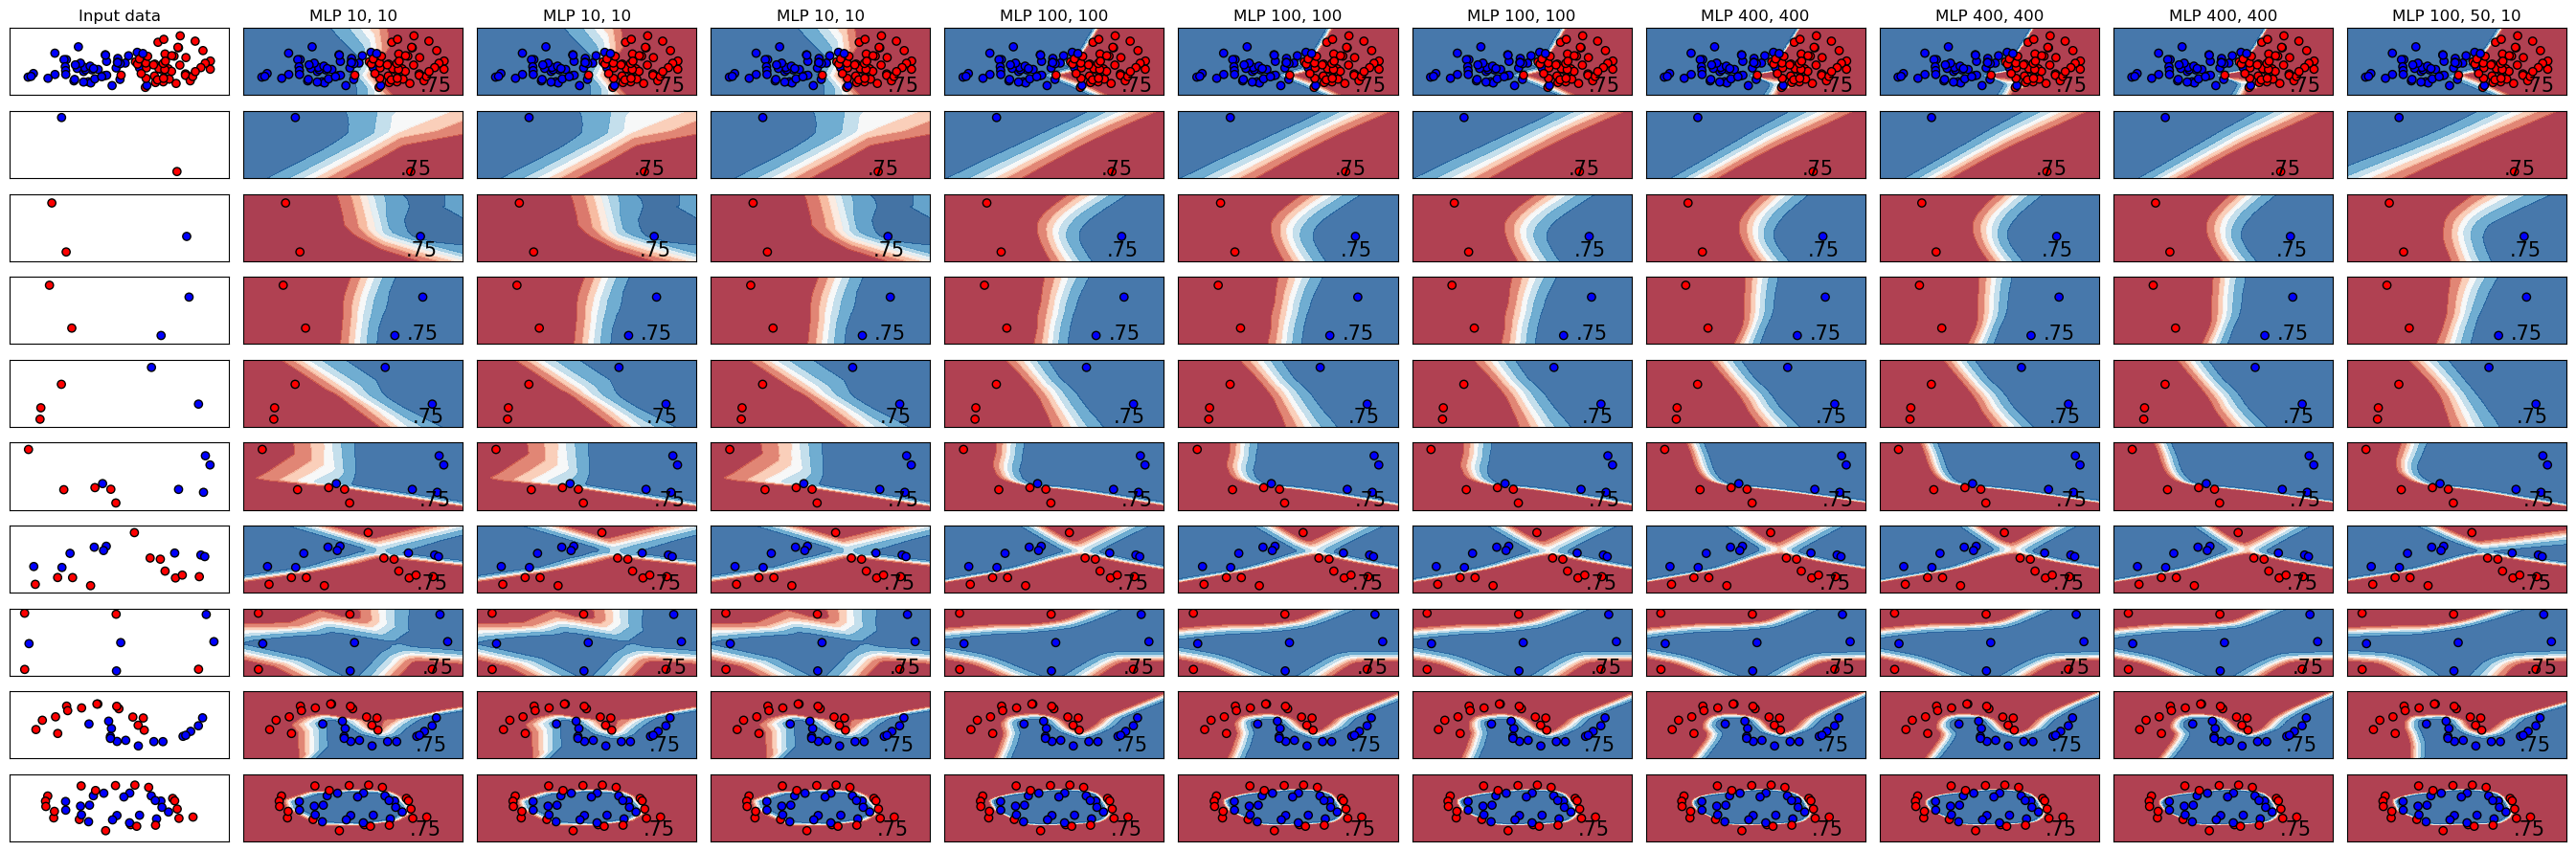

In [422]:
default_plotter(datasets, names, classifiers)

# SVM

For linearly separable data, the SVM constructs a straight line (in 2D) or a hyperplane (in higher dimensions) as the decision boundary.

When data is not linearly separable, we can use different (than linear) kernels to map the data into a higher-dimensional space where it becomes linearly separable. The decision boundary is then a non-linear curve in the original input space but linear in the feature space.

In the case of a polynomial kernel, with the increasing degree of the polynomial, the SVM can fit more intricate (e.g., twisting more) boundaries between classes, but we also risk overfitting to the data.

Margin Softness (Slack Variable):
For datasets with overlapping classes, SVM uses slack variables to allow some points to violate the margin.
A softer margin leads to smoother boundaries that tolerate noise, while a harder margin enforces stricter separation.

In [424]:
datasets = [
    linearly_separable,
    generate_classification_data(samples=2, features=2, informative=2, random_state=42),
    generate_classification_data(samples=3, features=2, informative=2, random_state=42),
    generate_classification_data(samples=4, features=2, informative=2, random_state=42),
    generate_classification_data(samples=5, features=2, informative=2, random_state=42),
    generate_classification_data(samples=10, features=2, informative=2, random_state=42),    
    generate_classification_data(samples=20, features=2, informative=2, random_state=42),
    generate_grid_data(grid_size=3, random_state=6),
    generate_moons_data(samples=30, random_state=42),
    generate_circles_data(samples=40, noise=0.1, factor=0.6, random_state=None)
]


names = [
    "SVM-C Linear K",
    "SVM-C Poly K, d=2",
    "SVM-C Poly K, d=3",
    "SVM-C RBF K"
]
 # CONSIDER probability=True,
classifiers = [
    SVC(kernel="linear", random_state=42),
    SVC(kernel="poly", degree=2, random_state=42),
    SVC(kernel="poly", degree=3, random_state=42),
    SVC(kernel="rbf", random_state=42),

]

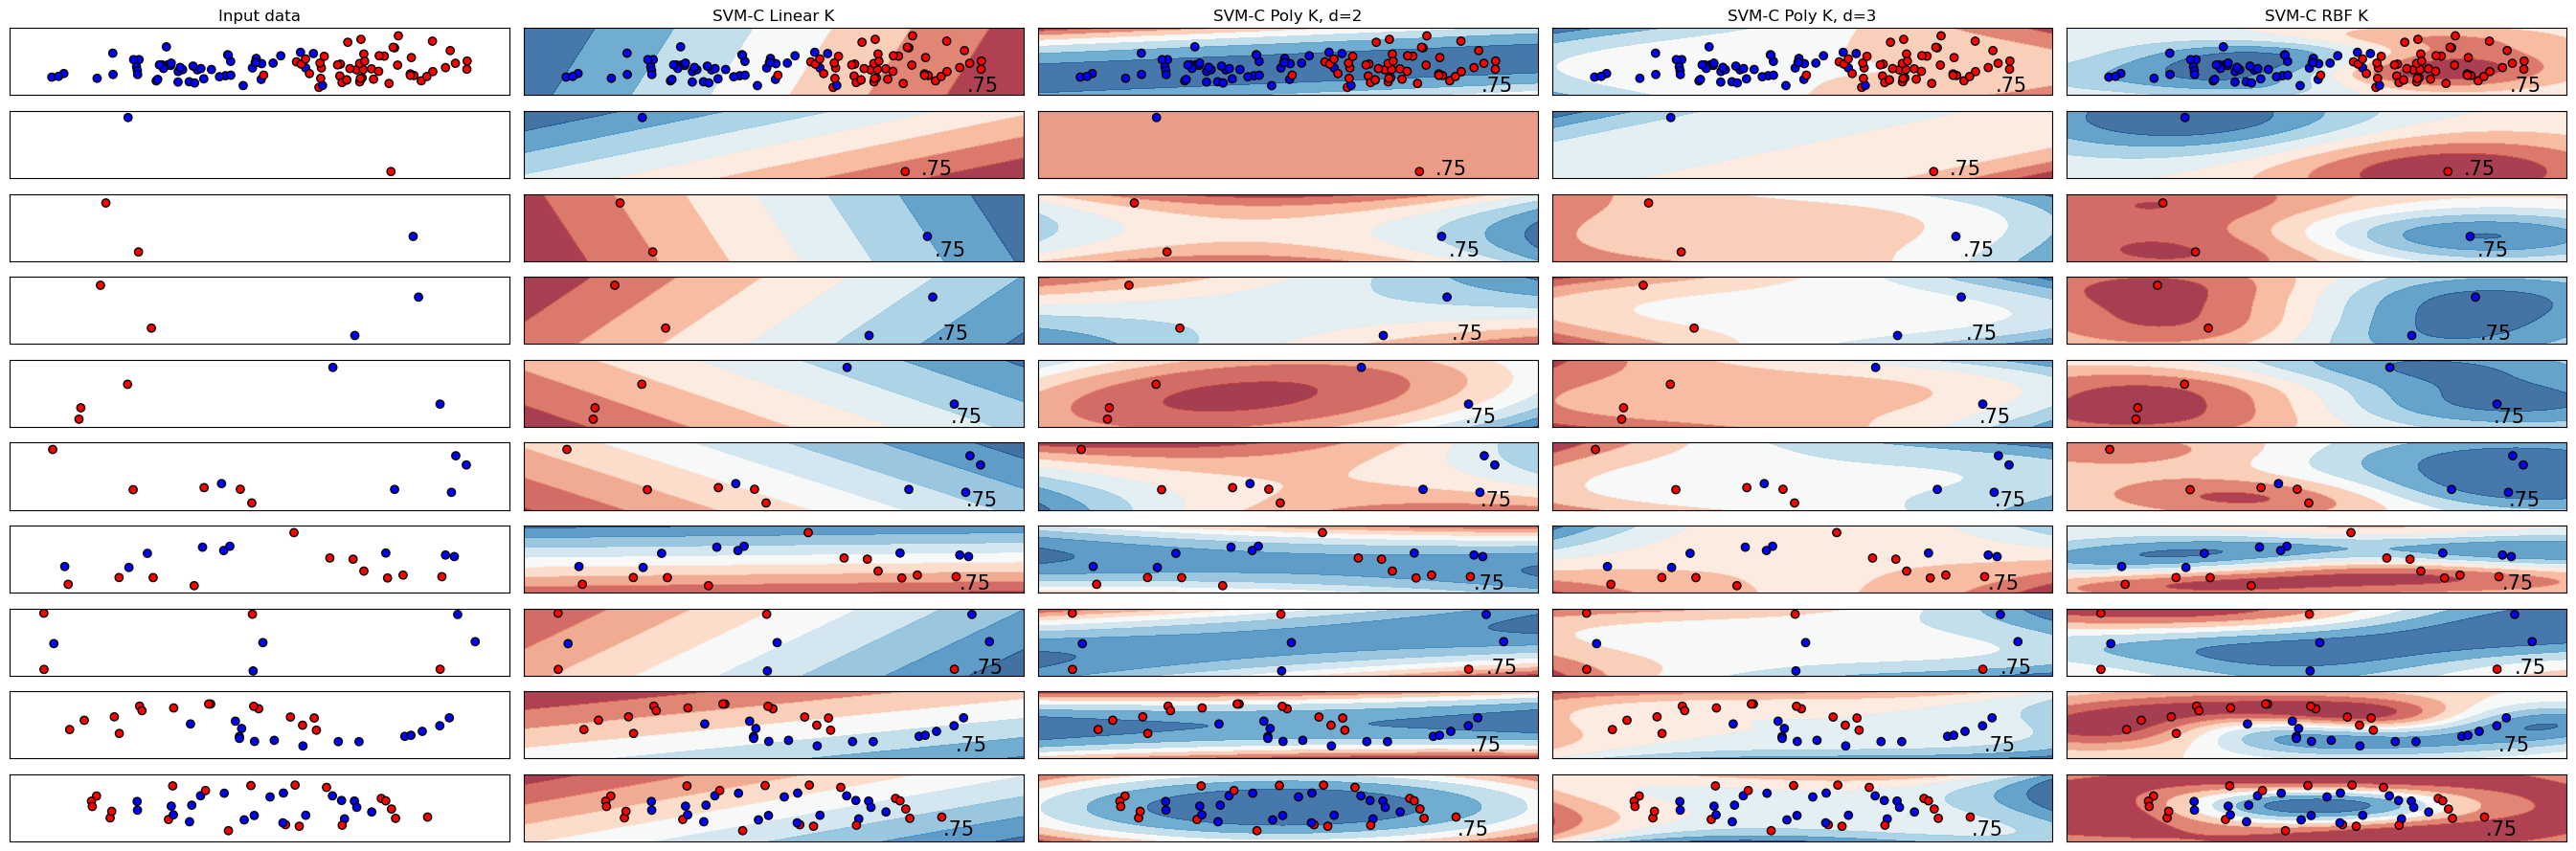

In [425]:
default_plotter(datasets, names, classifiers)

#### Regularization Parameter (C):
C controls the trade-off between maximizing the margin and minimizing misclassification:
Small C: Increases margin size by allowing some misclassifications. This leads to a simpler, smoother decision boundary that generalizes better.
Large C: Reduces the margin to classify all training points correctly. This can result in a complex boundary that overfits the training data.


In [427]:
names = [
    "SVM-C Linear K, C=0.025",
    "SVM-C Linear K, C=0.7",
    "SVM-C Linear K, C=5",

    "SVM-C Poly K, d=3, C=0.025",
    "SVM-C Poly K, d=3, C=0.7",
    "SVM-C Poly K, d=3, C=5",

    "SVM-C RBF K, C=0.025",
    "SVM-C RBF K, C=0.7",
    "SVM-C RBF K, C=5"
]

classifiers = [
    SVC(kernel="linear", random_state=42, C=0.025),
    SVC(kernel="linear", random_state=42, C=0.7),
    SVC(kernel="linear", random_state=42, C=5),
    

    SVC(kernel="poly", degree=3, random_state=42, C=0.025),
    SVC(kernel="poly", degree=3, random_state=42),
    SVC(kernel="poly", degree=3, random_state=42),
    
    SVC(kernel="rbf",random_state=42, C=0.025),
    SVC(kernel="rbf", random_state=42, C=0.7),
    SVC(kernel="rbf", random_state=42, C=5),
]

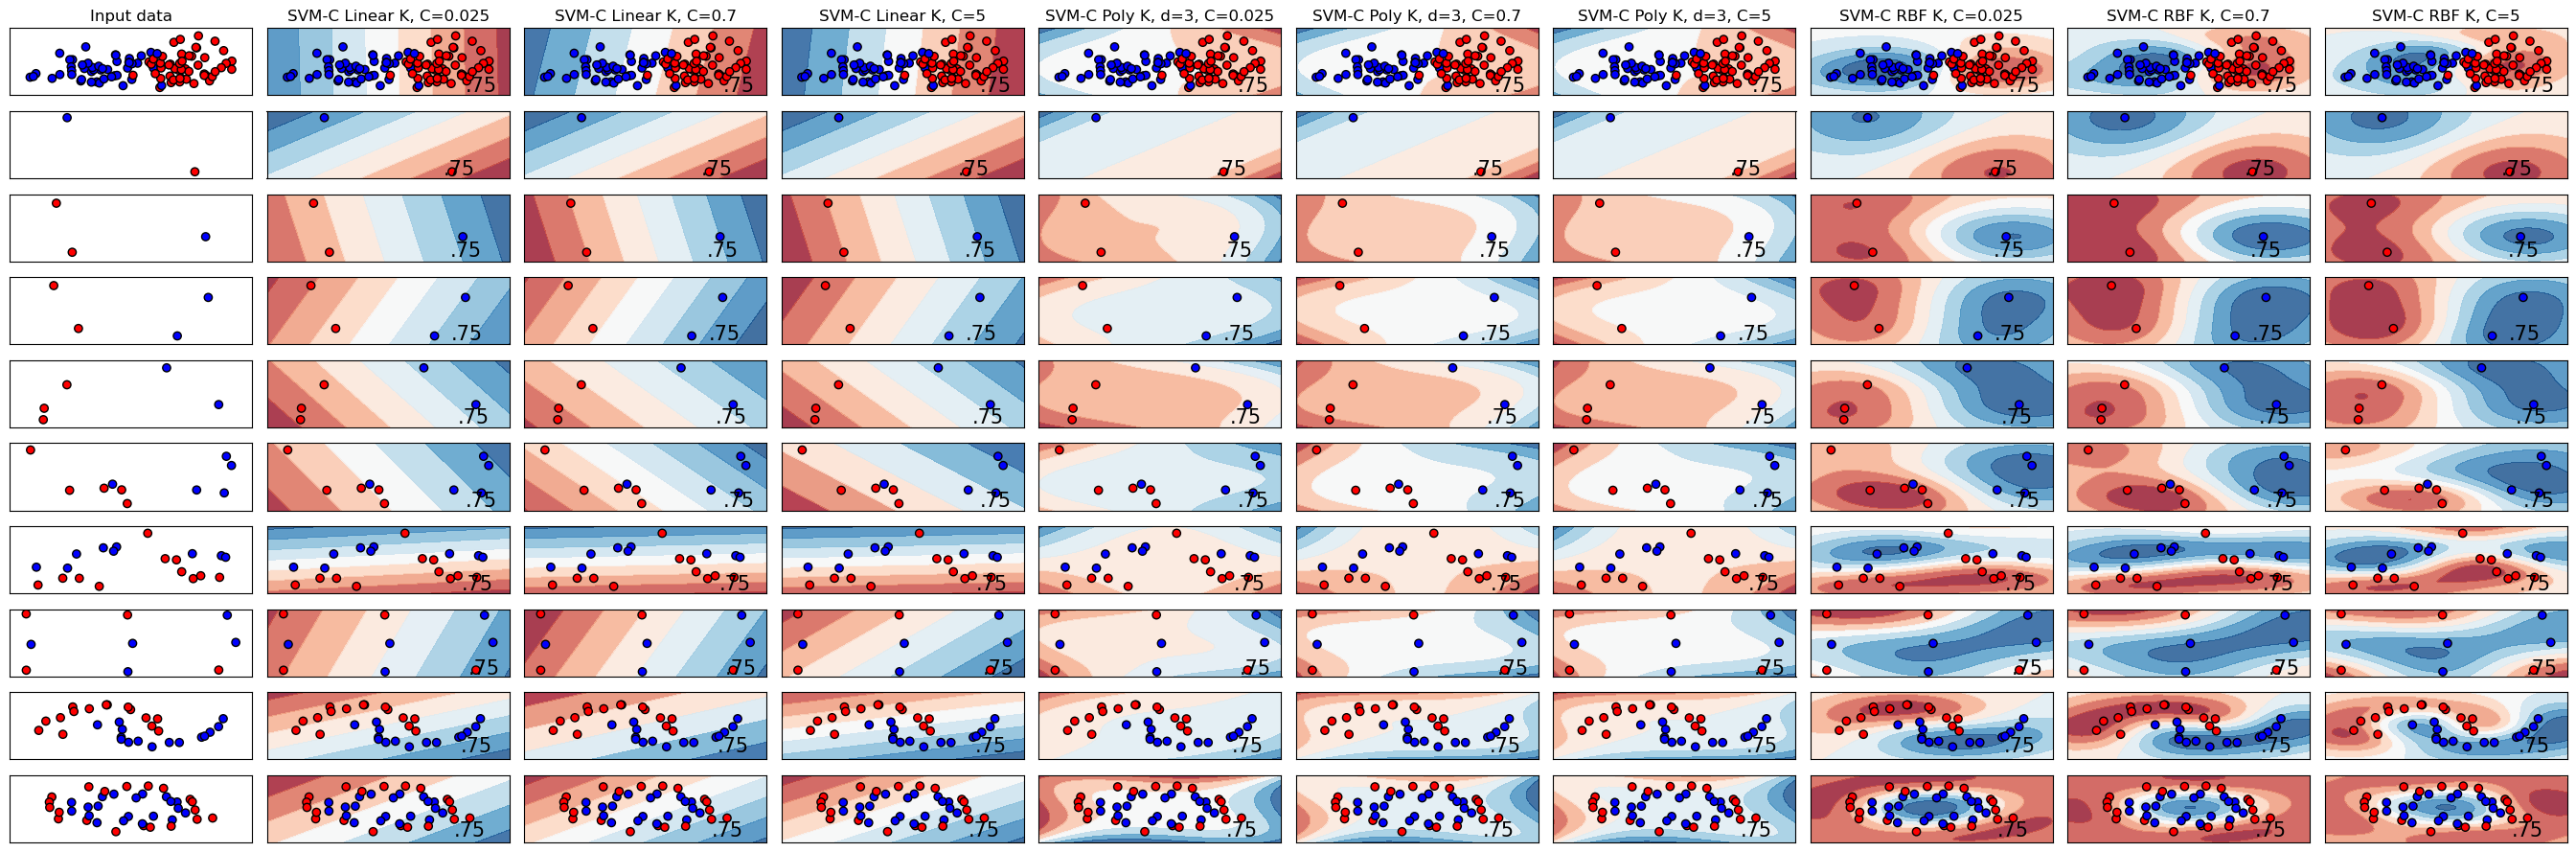

In [428]:
default_plotter(datasets, names, classifiers)



#### Gamma (for RBF Kernel):
Gamma controls the influence of individual data points on the decision boundary:
Low Gamma: Each data point has a far-reaching influence, leading to smoother, more generalized decision boundaries.
High Gamma: Each data point has a limited influence, resulting in a highly flexible decision boundary that can overfit the data.



In [430]:
names = [
    "SVM-C RBF gamma=0.01",
    "SVM-C RBF gamma=0.3",
    "SVM-C RBF gamma=1",
    "SVM-C RBF gamma=3",
    "SVM-C RBF gamma=10"
]
 # CONSIDER probability=True,
classifiers = [
    SVC(kernel="rbf", gamma=0.01, random_state=42),
    SVC(kernel="rbf", gamma=0.3, random_state=42),
    SVC(kernel="rbf", gamma=1, random_state=42),
    SVC(kernel="rbf", gamma=3, random_state=42),
    SVC(kernel="rbf", gamma=10, random_state=42)
]

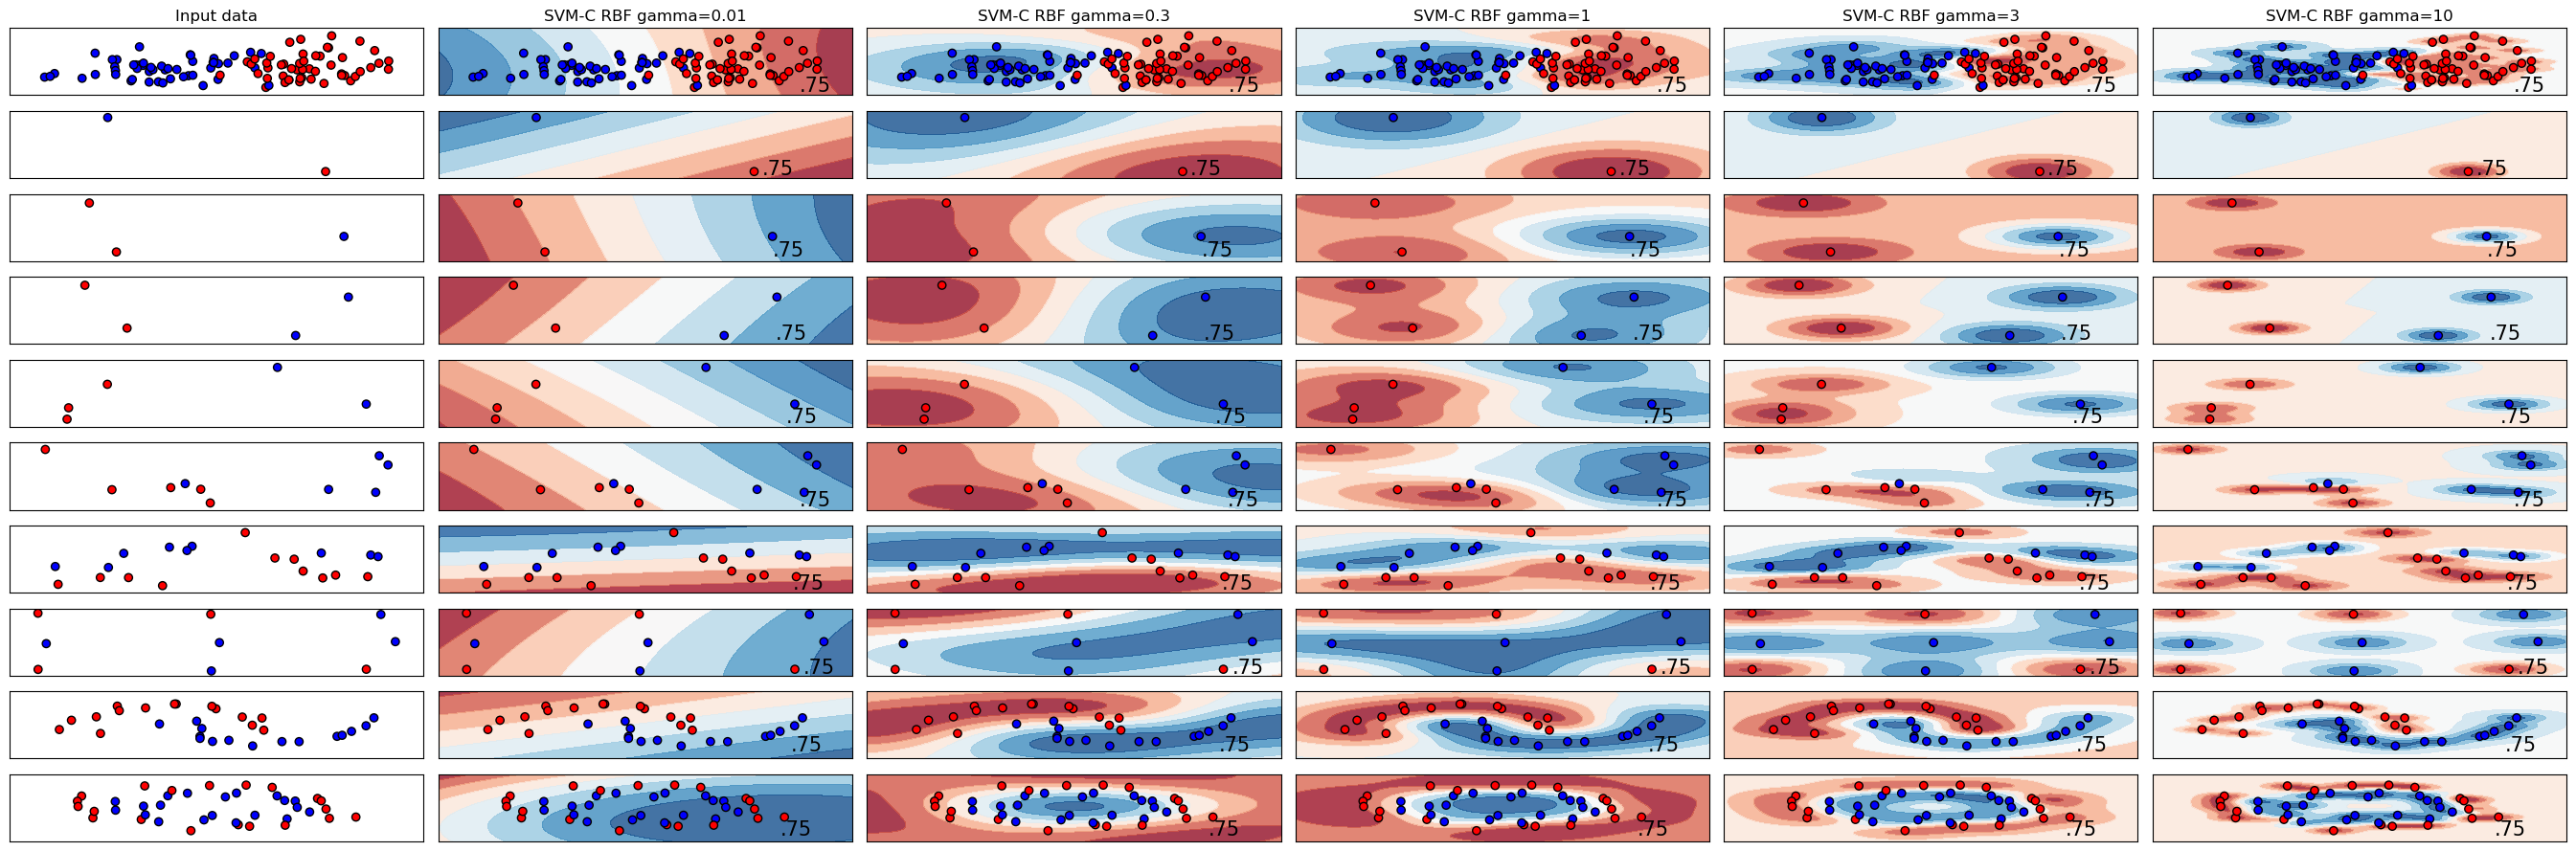

In [431]:
default_plotter(datasets, names, classifiers)

# TODO: Code that also plots the margins


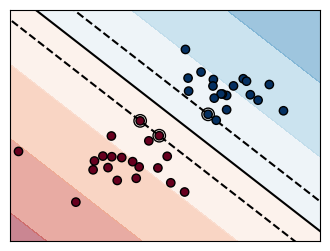

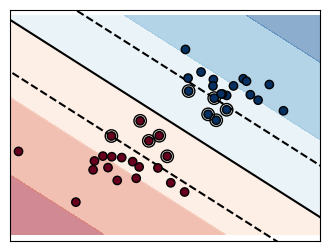

In [433]:
# Code source: Gaël Varoquaux
# Modified by Vladimir Lazarik
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [434]:
# TODO
classifiers = [
    # SVC(kernel="linear", C=0.025, random_state=42),
    # SVC(gamma=2, C=1, random_state=42),
    # SVC(kernel="poly", degree=4, probability=True),
    # SVC(kernel="rbf", probability=True),
    # KNeighborsClassifier(n_neighbors=1),
    # DecisionTreeClassifier(max_depth=5, random_state=42),
    # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    # MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    # GaussianNB(),
    # LogisticRegression(),
    # LinearDiscriminantAnalysis(),
    # QuadraticDiscriminantAnalysis(),
]
